In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import pyplot as plt

import os

from scipy import stats

In [3]:
path_precips = "C:\\Users\\jgonzalez\\Documents\\Indicadores\\data\\Precips\\"
files_precips = os.listdir(path_precips)
precips_df = pd.DataFrame()
for file in files_precips:
    p = pd.read_csv(path_precips + file,parse_dates=True,dayfirst=False)
    p = p[["Fecha","Valor (mm)"]]
    
    # formato de fecha
    p['Fecha'] = pd.to_datetime(p['Fecha'], format='%Y-%m-%d')
    p = p.set_index("Fecha")
    p = p.rename(columns={"Valor (mm)": file[:-4]})
    
    #print(p)
    precips_df = pd.concat([precips_df,p],axis=1)

precips_df = precips_df.loc[precips_df.index < "2024"]
precips_df

,ATP01PT01,ATP01PT02,C11,JTU01PT11,JTU01PT22,JTU01PT32,JTU01PT42,JTU01PT53,JTU01PT63,JTU01PT73,JTU01PT83,P35
Fecha,,,,,,,,,,,,
2002-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.7
2003-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.9
2003-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,53.9,64.1,73.1,42.4,NaN,39.1,NaN,48.1,51.6,60.2,48.1,NaN
2023-09-01,32.6,37.1,23.2,14.3,NaN,13.8,NaN,14.1,9.0,10.8,5.3,NaN
2023-10-01,39.9,43.2,16.8,23.1,NaN,37.0,NaN,45.8,53.6,61.9,56.4,NaN


In [4]:
path_caudal = "C:\\Users\\jgonzalez\\Documents\\Indicadores\\data\\Caudal\\"
files_caudal = os.listdir(path_caudal)

caudales = pd.DataFrame()
for file in files_caudal:
    q = pd.read_csv(path_caudal + file,parse_dates=True,dayfirst=False)
    q = q[["Fecha","L/s"]]
    
    # formato de fecha
    q['Fecha'] = pd.to_datetime(q['Fecha'], format='%Y-%m-%d %H:%M:%S')
    q = q.set_index("Fecha")
    q = q.rename(columns={"L/s": file[:-4]})
    
    #print(p)
    caudales = pd.concat([caudales,q],axis=1)

caudales = caudales.loc[caudales.index < "2024"]
caudales

,ATP02HI01,H12,JTU01HQ11,JTU01HQ22,JTU01HQ32,JTU01HQ43
Fecha,,,,,,
2005-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-31 19:00:00,179.785522,NaN,85.623252,1.936927,5.541844,27.242452
2023-12-31 20:00:00,175.762146,NaN,86.098528,1.910311,5.507160,26.373503
2023-12-31 21:00:00,171.122583,NaN,85.079852,1.891139,5.104860,25.581812


2017 2017

 (2018,)
   ATP01PT02  mes
0       44.3    3
1       52.1   12
2       55.3    7
3       58.7    9
4       69.8    6
mes analizandose 3 mes anterior 2
mes analizandose 12 mes anterior 11
mes analizandose 7 mes anterior 6
precip 55.3

 (2019,)
   ATP01PT02  mes
0       60.5    8
1       65.6    9
2       71.9    4
3       73.6    7
4       79.5    3
mes analizandose 8 mes anterior 7
precip 60.5

 (2020,)
   ATP01PT02  mes
0       43.4    3
1       49.3    8
2       58.3   10
3       60.6    2
4       82.4    4
mes analizandose 3 mes anterior 2
precip 43.4

 (2021,)
   ATP01PT02  mes
0       48.5    8
1       73.6    1
2       82.1    7
3       84.6    6
4       92.8   12
mes analizandose 8 mes anterior 7
precip 48.5

 (2022,)
   ATP01PT02  mes
0       38.2    9
1       63.1   11
2       71.5    1
3       82.4    8
4       91.7    5
mes analizandose 9 mes anterior 8
precip 38.2

 (2023,)
   ATP01PT02  mes
0       37.1    9
1       43.2   10
2       54.0    6
3       64.1    8


C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

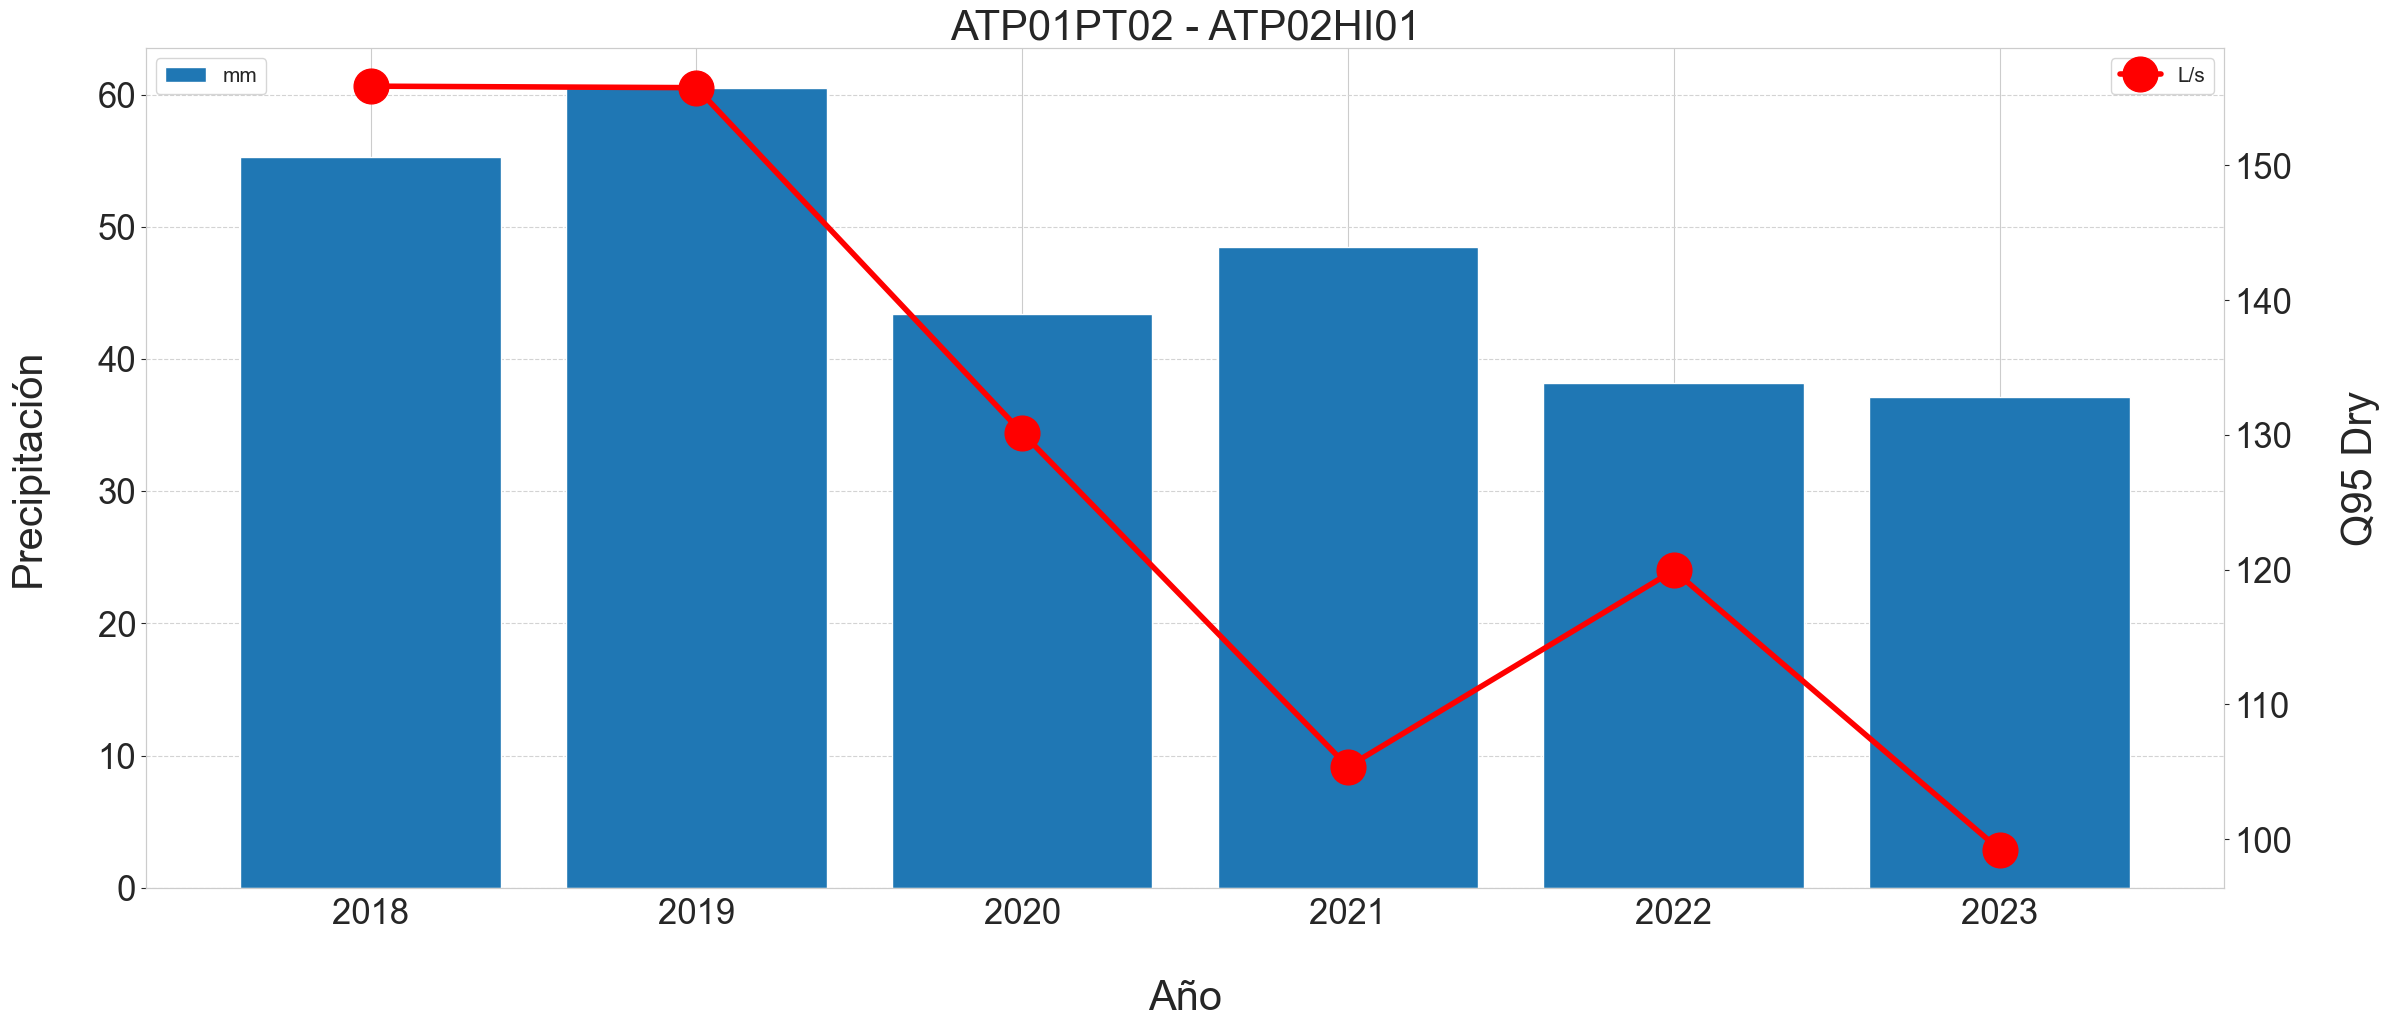

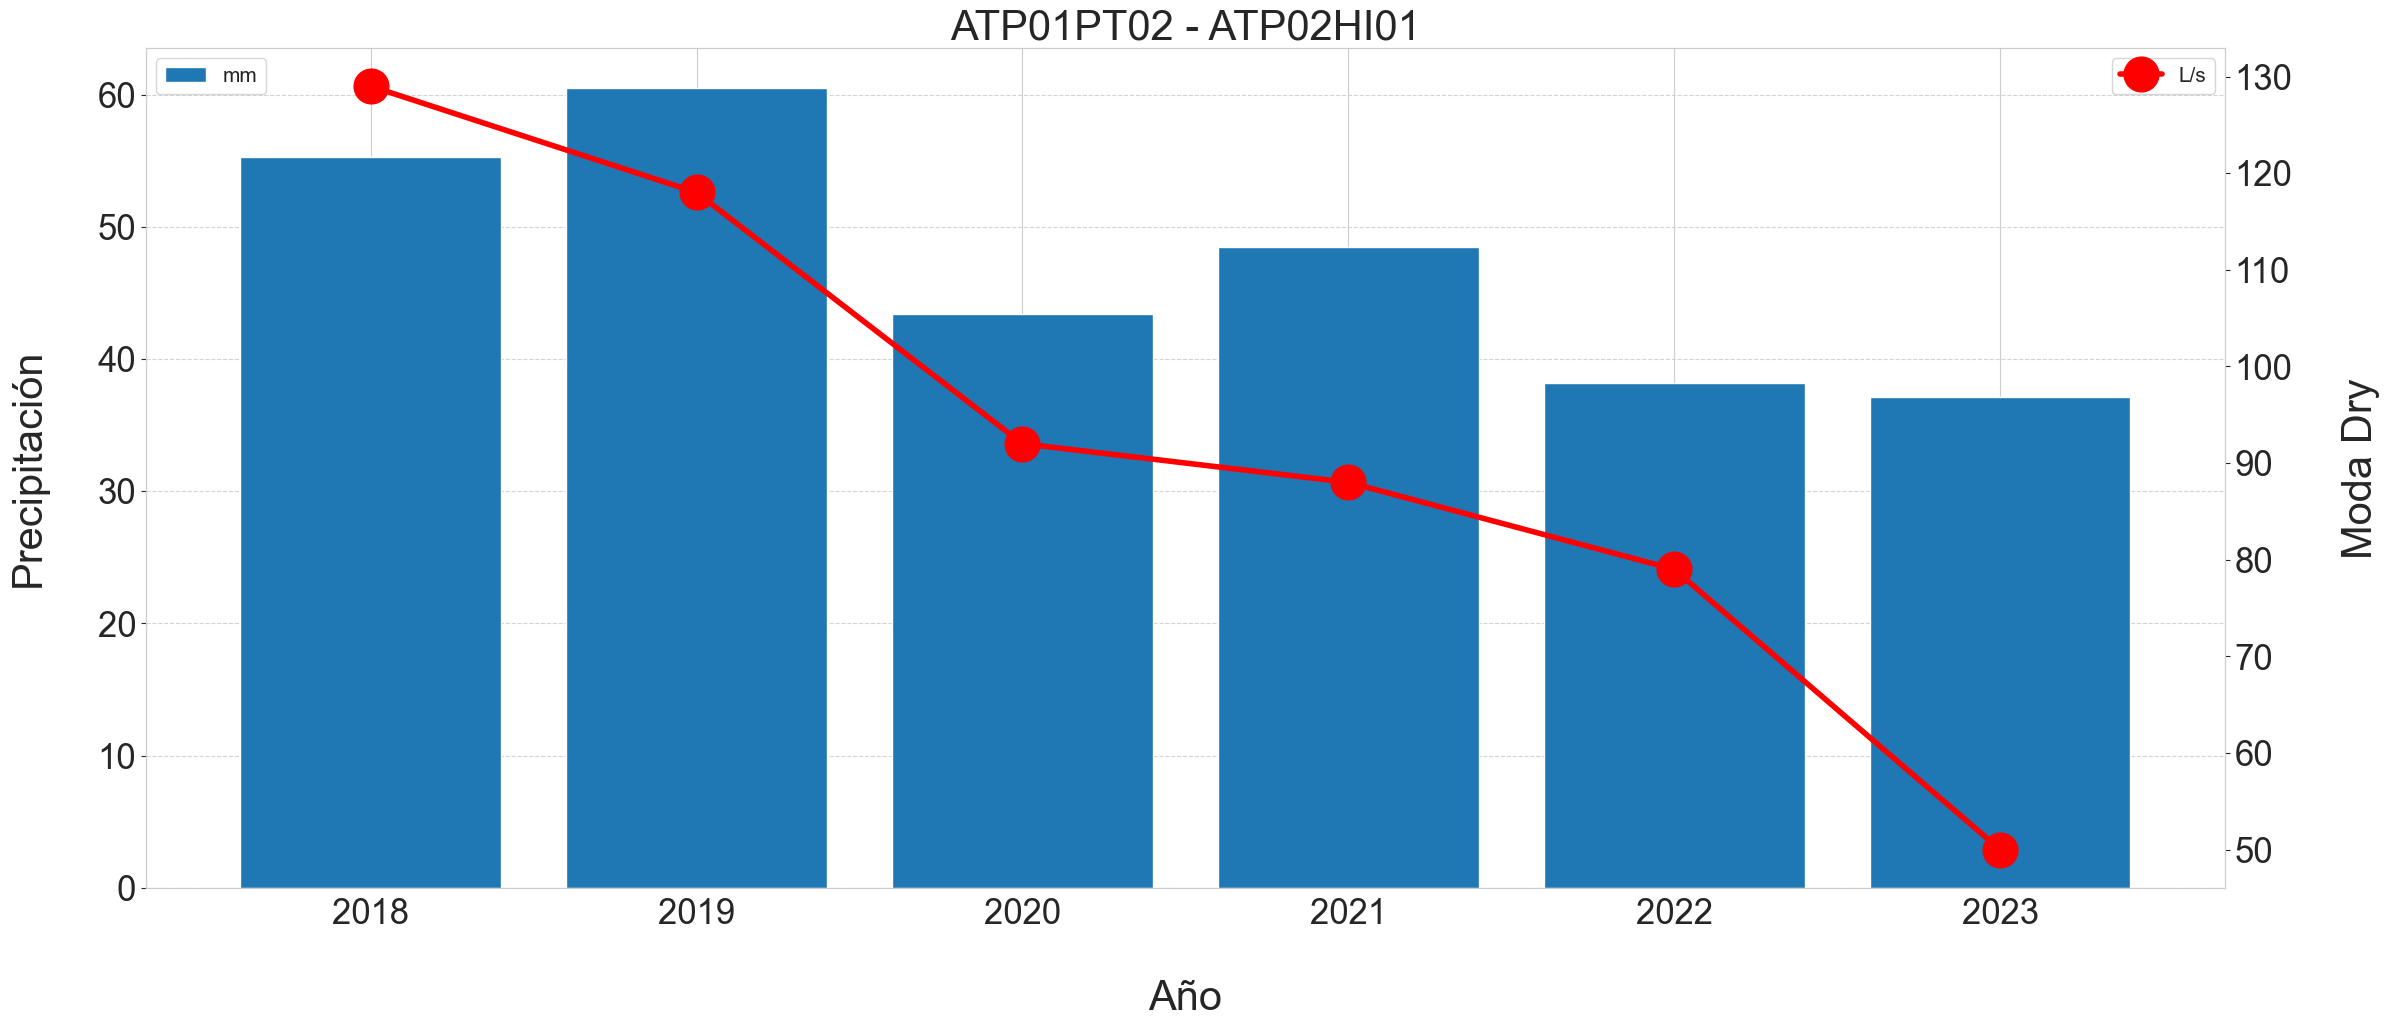

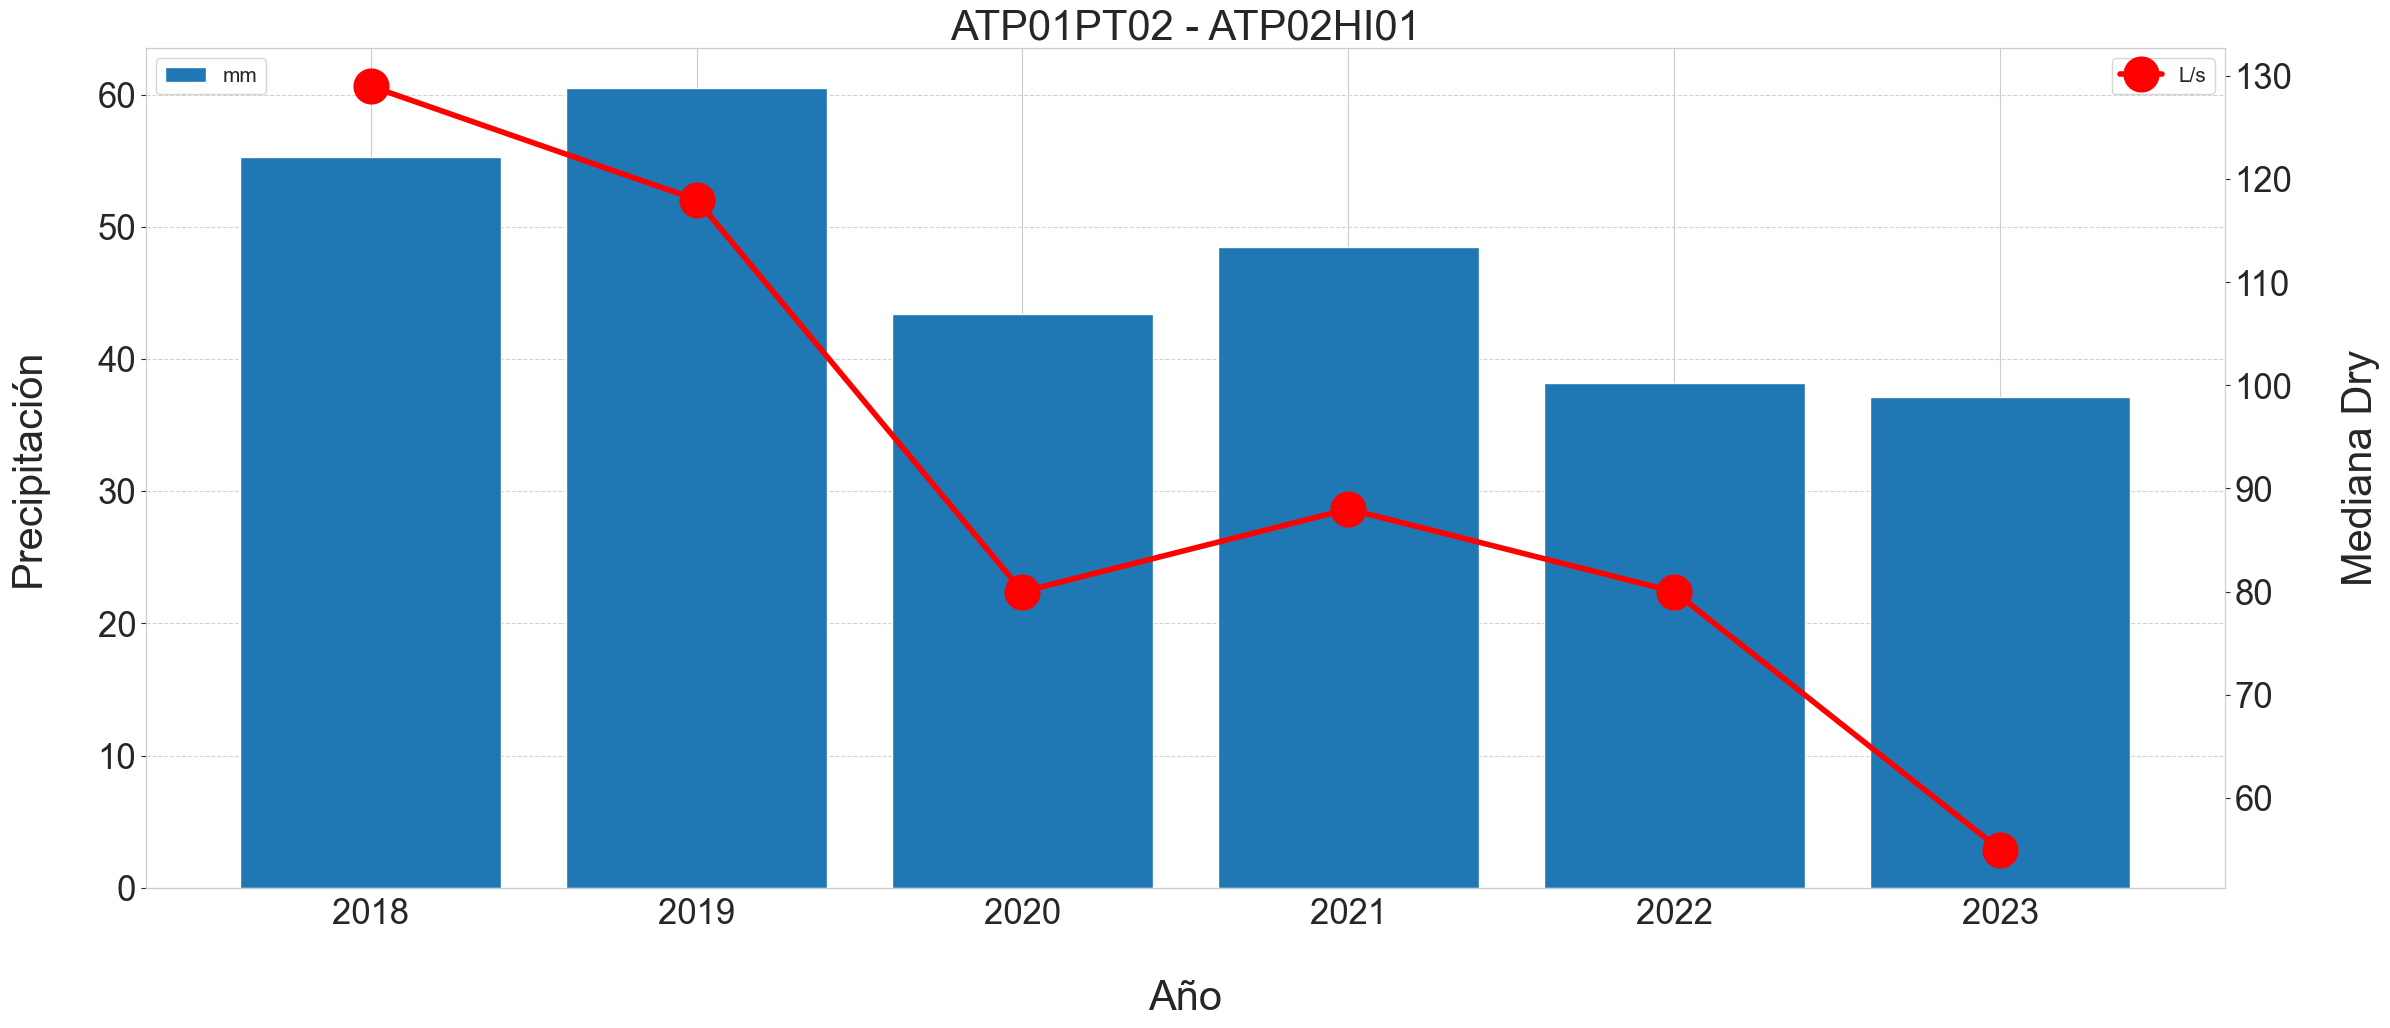

2013 2013

 (2014,)
   JTU01PT32  mes
0       27.8    7
1       45.6    9
2       52.5   12
3       56.1    6
4      102.3    5
mes analizandose 7 mes anterior 6
precip 27.8

 (2015,)
   JTU01PT32  mes
0       12.1   12
1       13.8    9
2       19.1    8
3       40.5    5
4       45.6    4
mes analizandose 12 mes anterior 11
mes analizandose 9 mes anterior 8
precip 13.8

 (2016,)
   JTU01PT32  mes
0        9.4    8
1       15.7    2
2       25.7    7
3       32.4    1
4       44.0    5
mes analizandose 8 mes anterior 7
precip 9.4

 (2017,)
   JTU01PT32  mes
0       21.3    7
1       37.8    9
2       47.6    8
3       63.6   10
4       69.2    4
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
precip 37.8

 (2018,)
   JTU01PT32  mes
0       26.4    7
1       30.2    6
2       32.3    8
3       49.7    3
4       53.2    9
mes analizandose 7 mes anterior 6
precip 26.4

 (2019,)
   JTU01PT32  mes
0       26.0    8
1       36.8    7
2       44.0    6
3       47.9    1
4

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

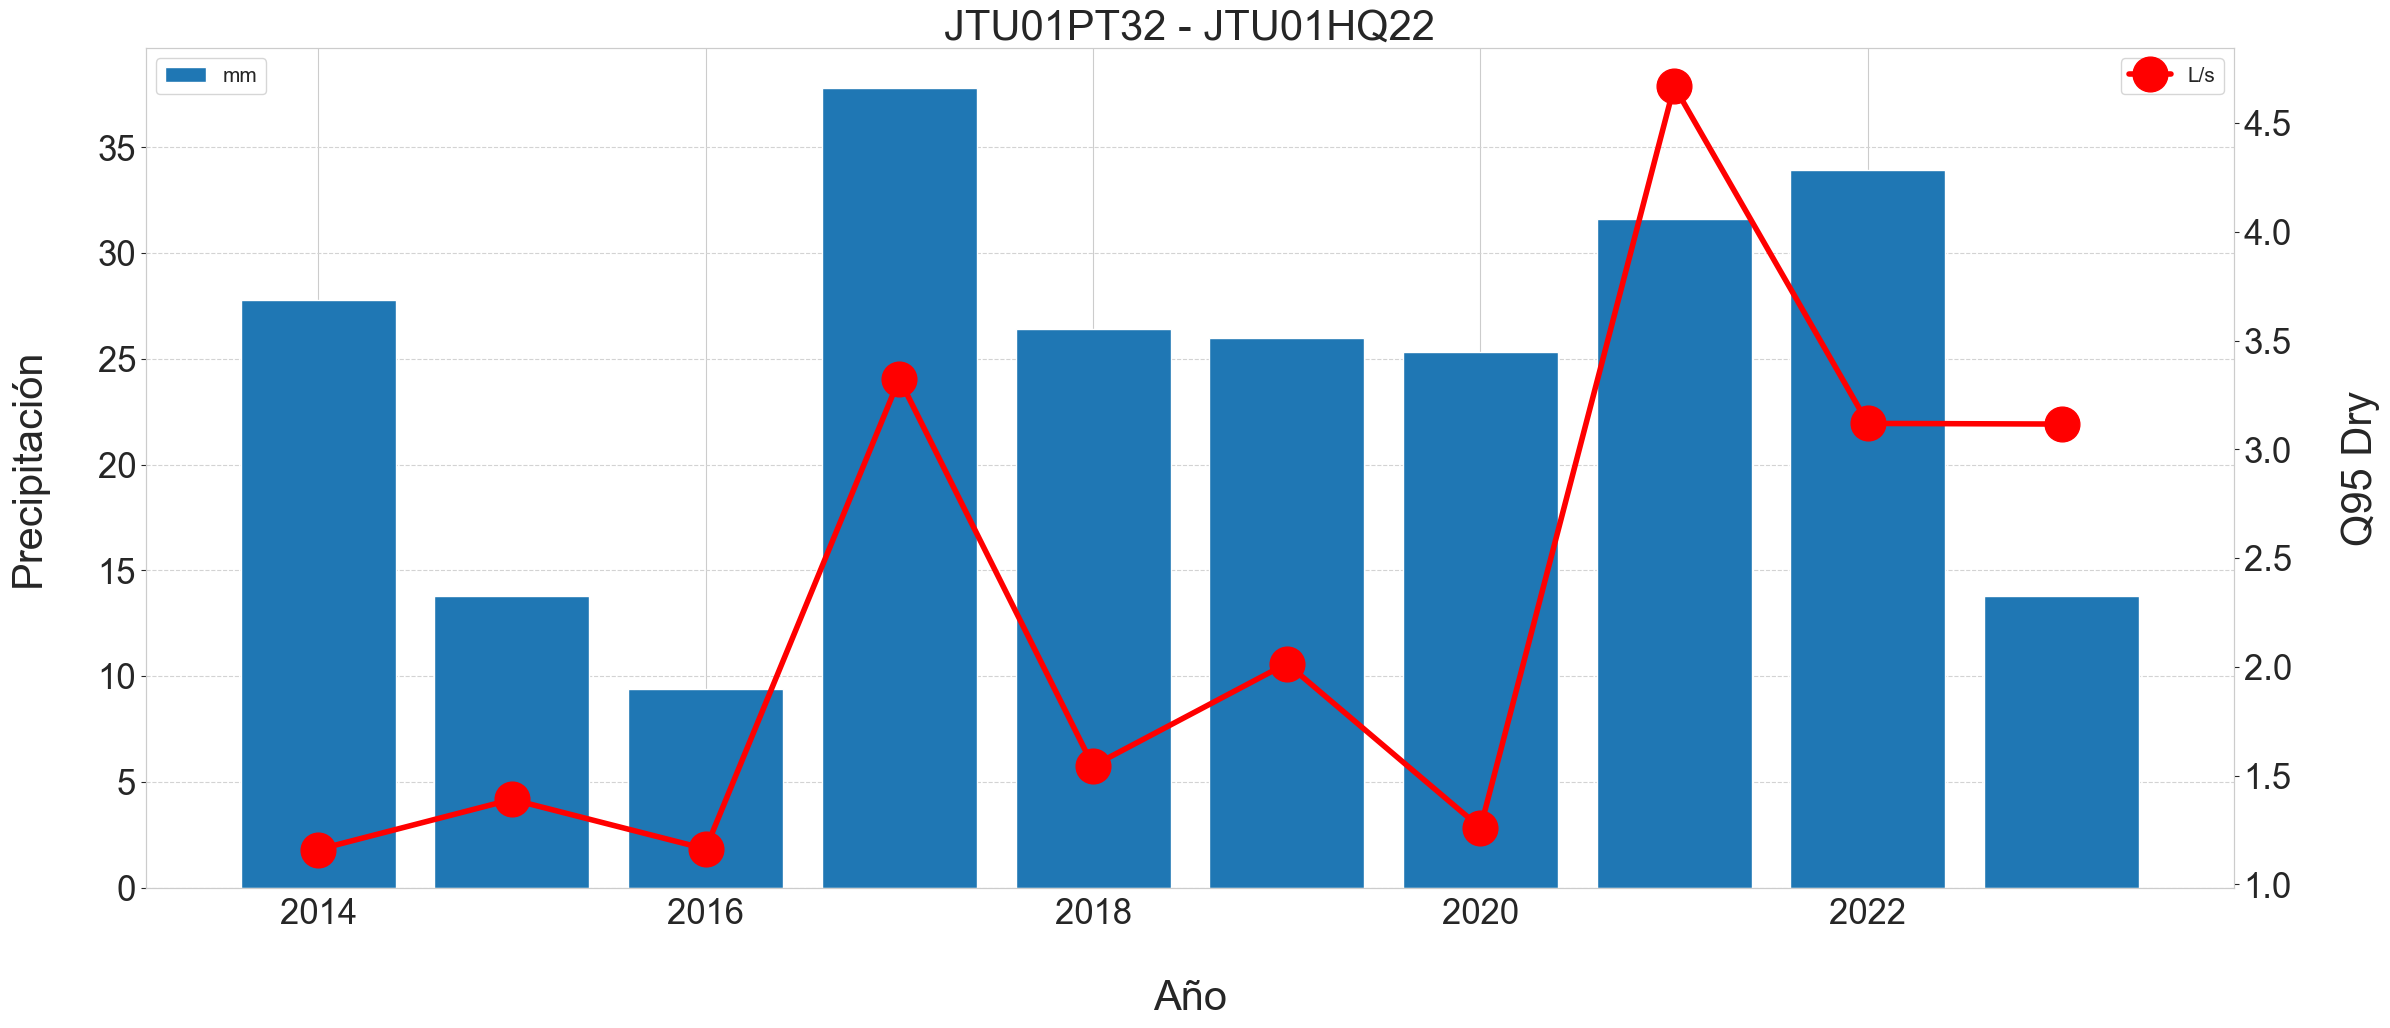

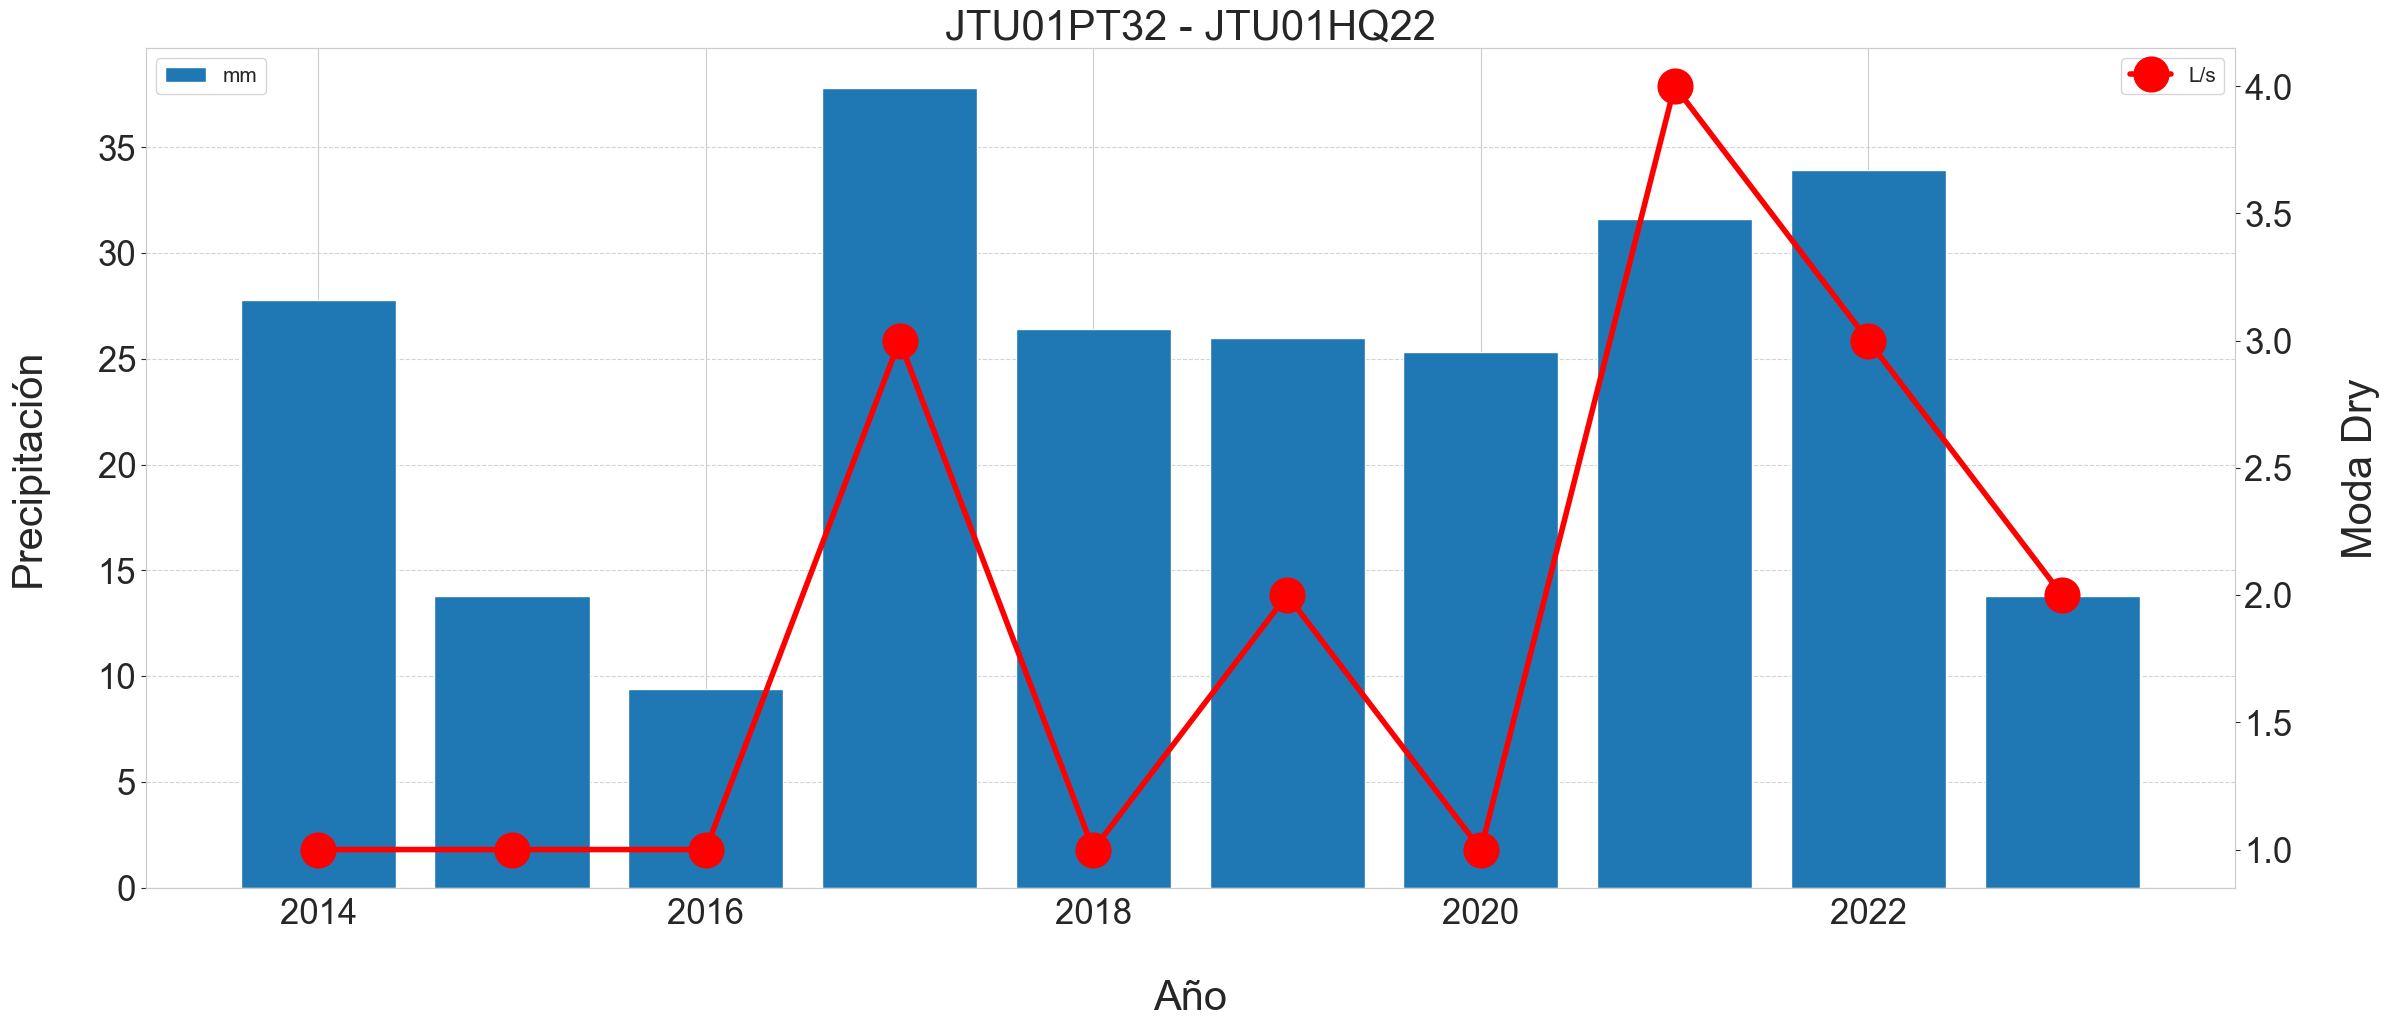

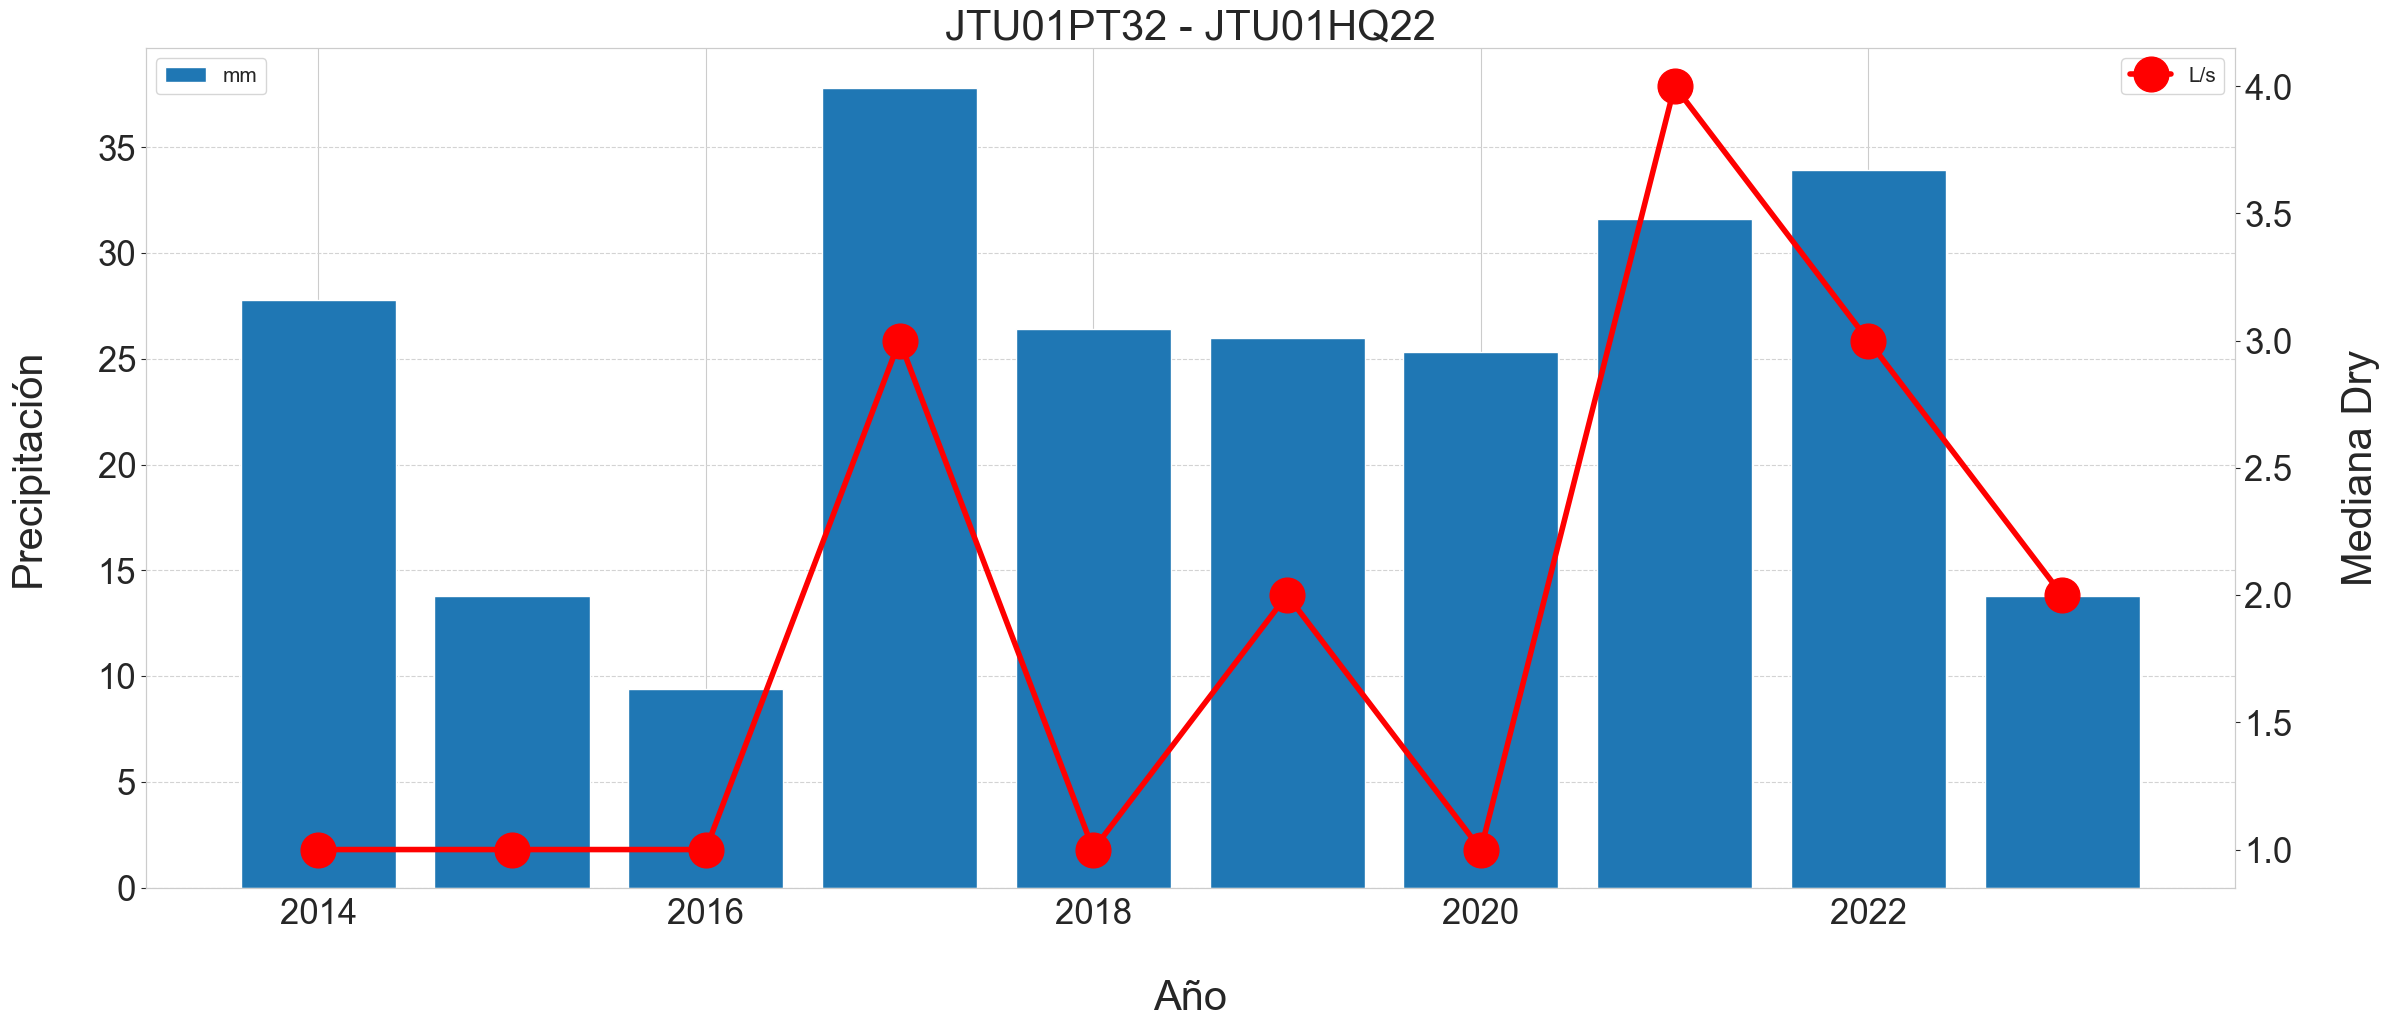

2014 2013

 (2015,)
   JTU01PT53  mes
0       16.8   12
1       44.2    1
2       51.9    6
3       55.1    2
4       58.9    7
mes analizandose 12 mes anterior 11
mes analizandose 1 mes anterior 0
mes analizandose 6 mes anterior 5
mes analizandose 2 mes anterior 1
precip 55.1

 (2016,)
   JTU01PT53  mes
0       19.9    8
1       31.5    2
2       36.5    1
3       36.5    7
4       45.4    5
mes analizandose 8 mes anterior 7
precip 19.9

 (2017,)
   JTU01PT53  mes
0       18.2    7
1       34.6    9
2       48.2    8
3       74.5    2
4       75.5   12
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
mes analizandose 8 mes anterior 7
precip 48.2

 (2018,)
   JTU01PT53  mes
0       33.4    8
1       35.3    6
2       36.7    7
3       53.5   10
4       57.0    9
mes analizandose 8 mes anterior 7
precip 33.4

 (2019,)
   JTU01PT53  mes
0       24.5    8
1       58.6    7
2       60.1    6
3       63.8    9
4       67.6    1
mes analizandose 8 mes anterior 7
precip 24.

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

mes analizandose 8 mes anterior 7
precip 44.0

 (2022,)
   JTU01PT53  mes
0       18.7    9
1       29.9    1
2       33.4   12
3       48.3    8
4       65.8    5
mes analizandose 9 mes anterior 8
precip 18.7

 (2023,)
   JTU01PT53  mes
0       14.1    9
1       31.6    6
2       45.8   10
3       48.1    8
4       50.5    7
mes analizandose 9 mes anterior 8
precip 14.1


C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]


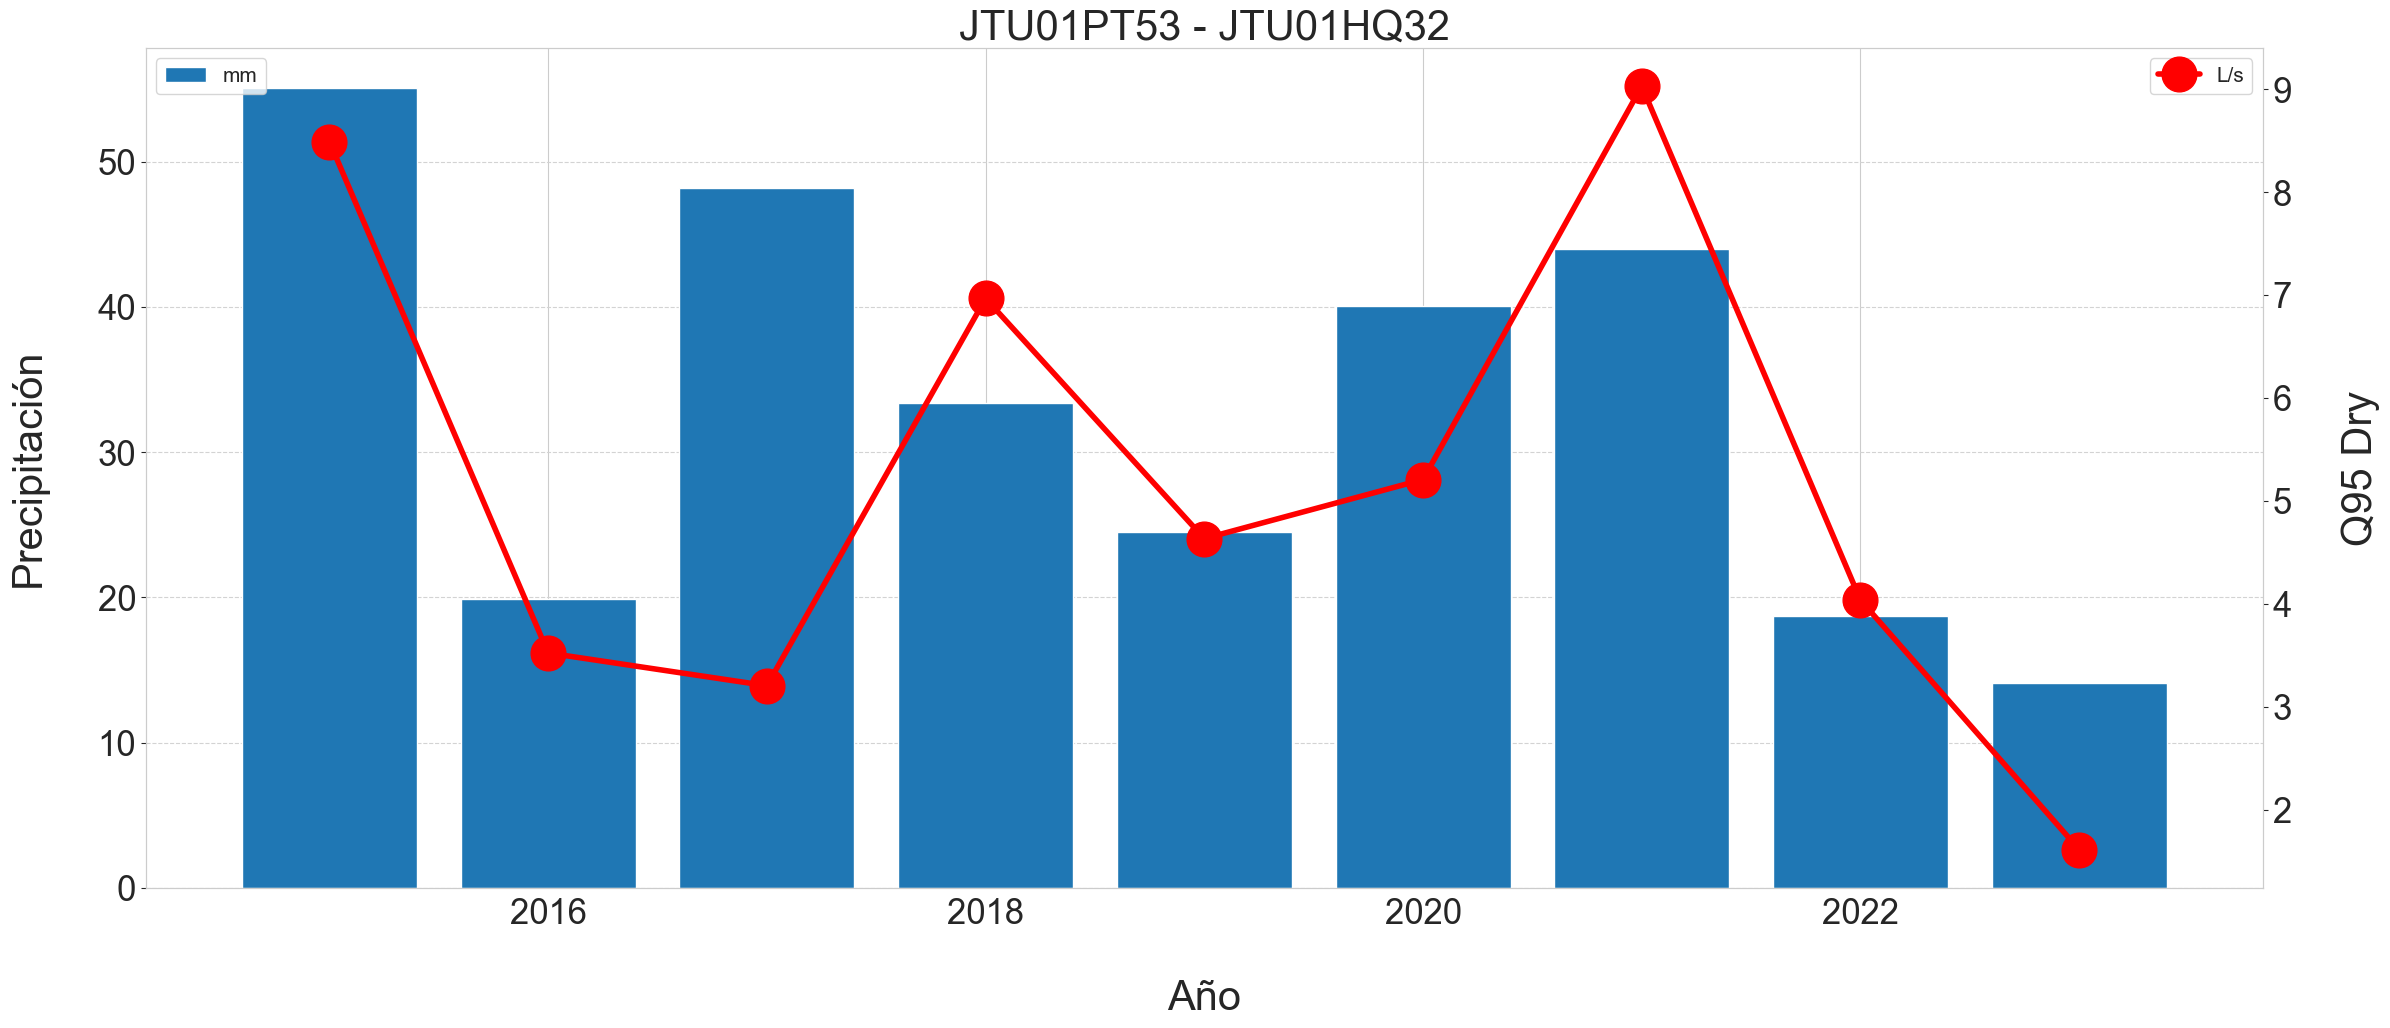

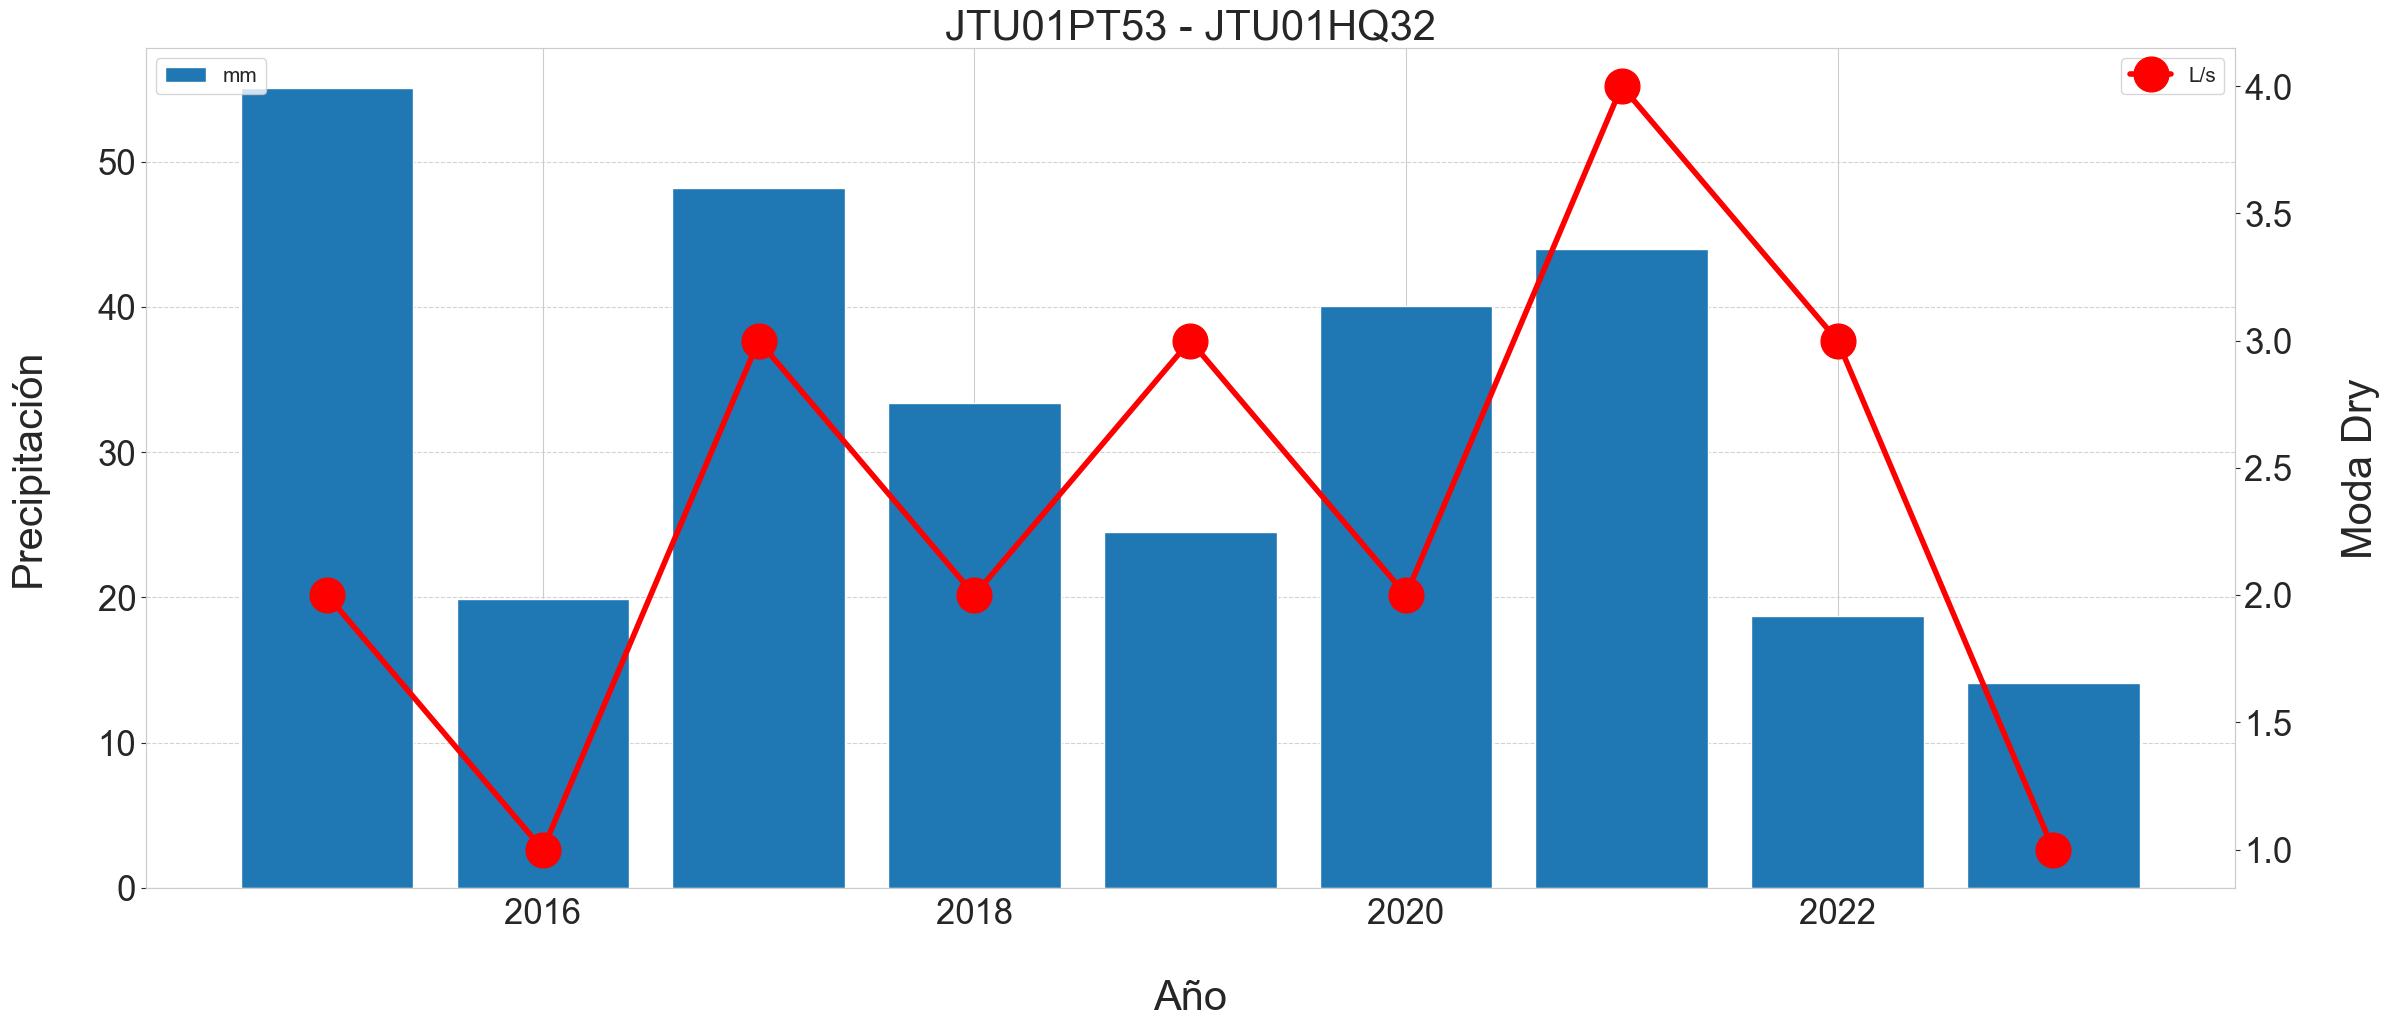

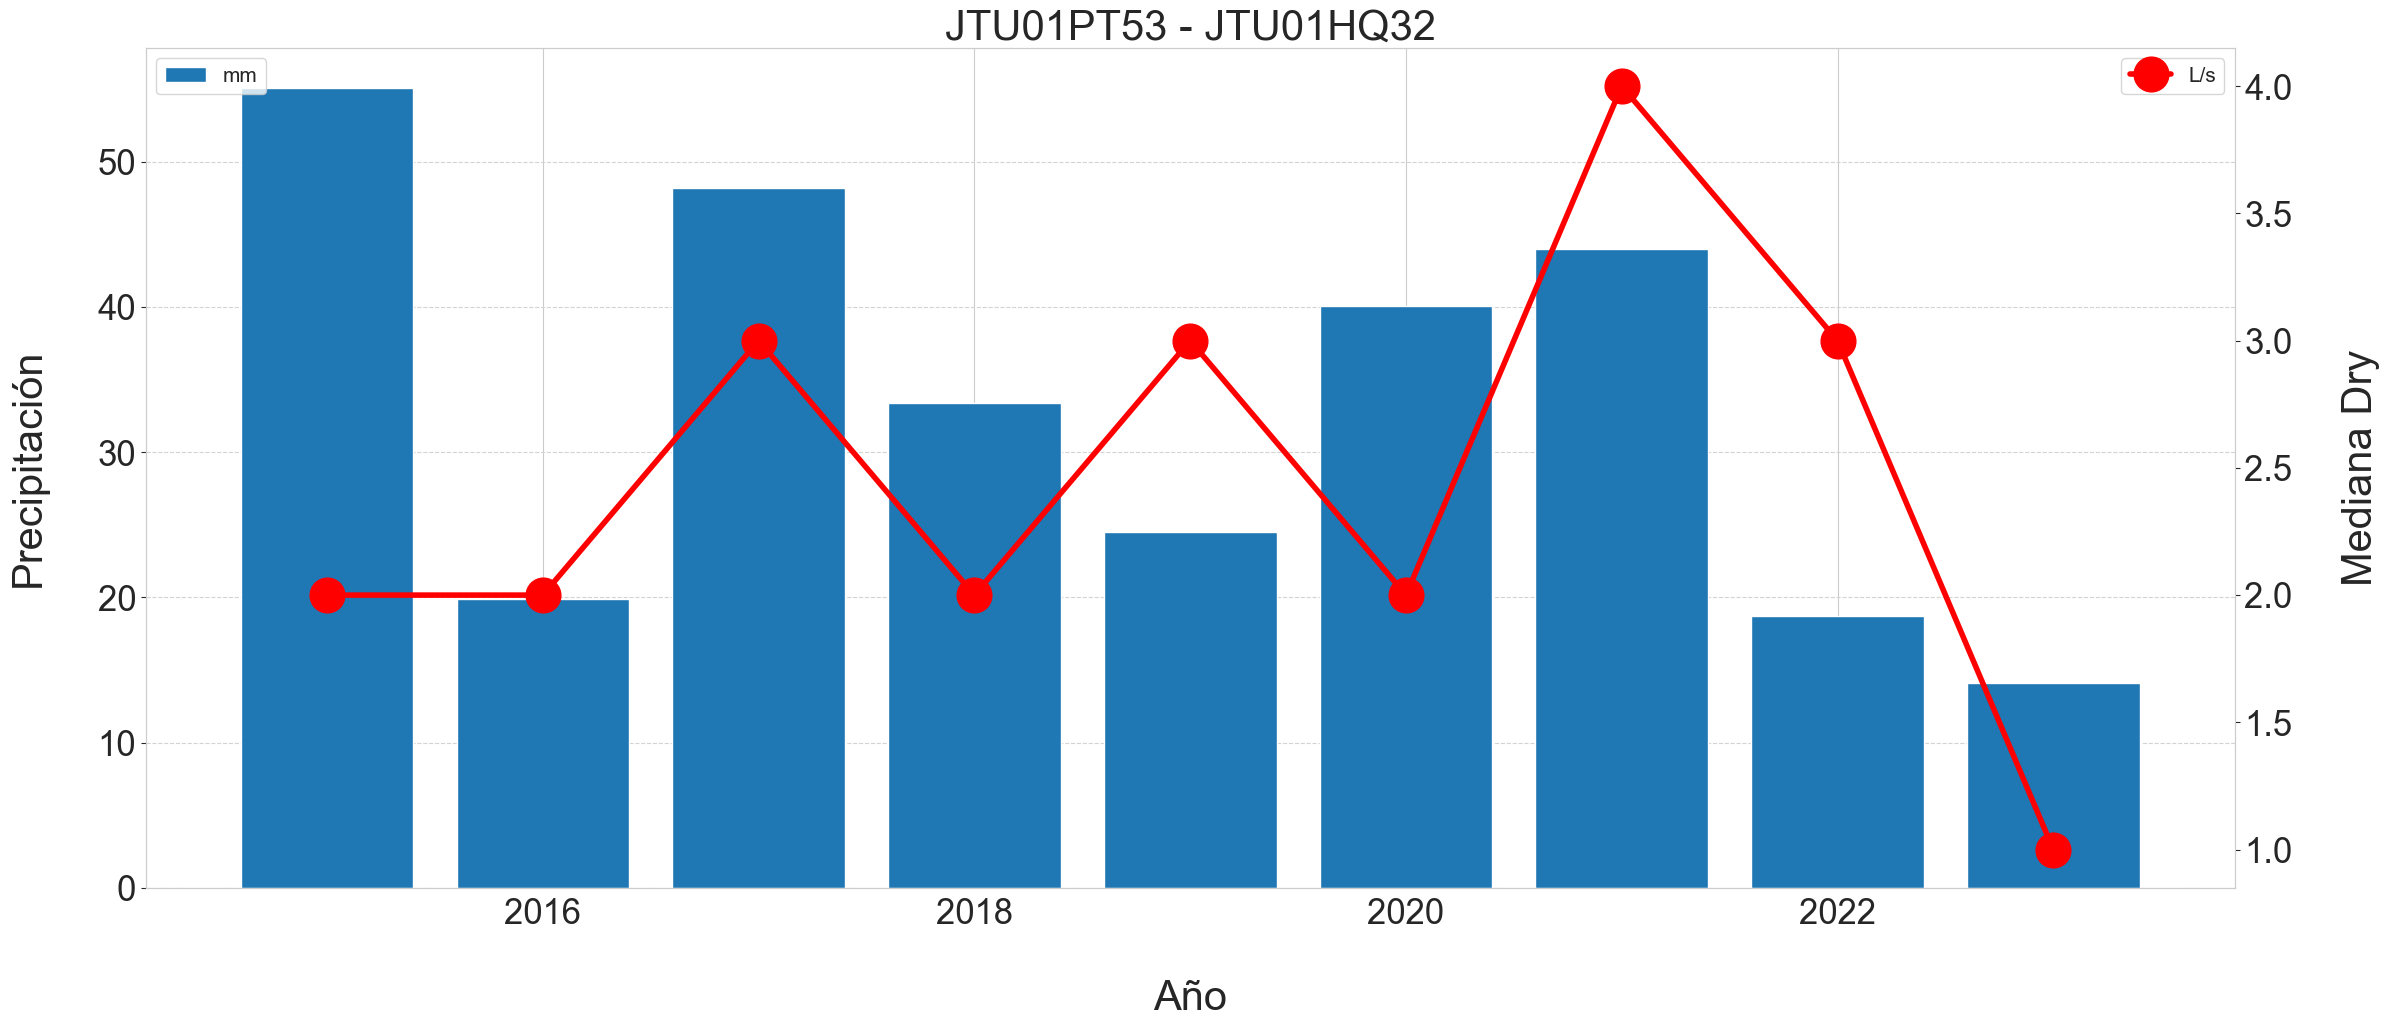

2014 2013

 (2015,)
   JTU01PT73  mes
0       26.9    9
1       34.1   12
2       35.9    8
3       50.1    1
4       54.2    2
mes analizandose 9 mes anterior 8
precip 26.9

 (2016,)
   JTU01PT73  mes
0       32.0    8
1       35.5    1
2       46.9   11
3       61.1    2
4       63.3    7
mes analizandose 8 mes anterior 7
precip 32.0

 (2017,)
   JTU01PT73  mes
0       35.1    7
1       42.2    9
2       61.4    2
3       61.6    8
4       66.9   12
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
precip 42.2

 (2018,)
   JTU01PT73  mes
0       46.5    6
1       46.8    8
2       47.5    7
3       53.4    3
4       55.8   10
mes analizandose 6 mes anterior 5
mes analizandose 8 mes anterior 7
precip 46.8

 (2019,)
   JTU01PT73  mes
0       32.8    8
1       43.2    1
2       61.9    9
3       69.9    3
4       74.0   12
mes analizandose 8 mes anterior 7
mes analizandose 1 mes anterior 0
mes analizandose 9 mes anterior 8
precip 61.9

 (2020,)
   JTU01PT73  mes
0     

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

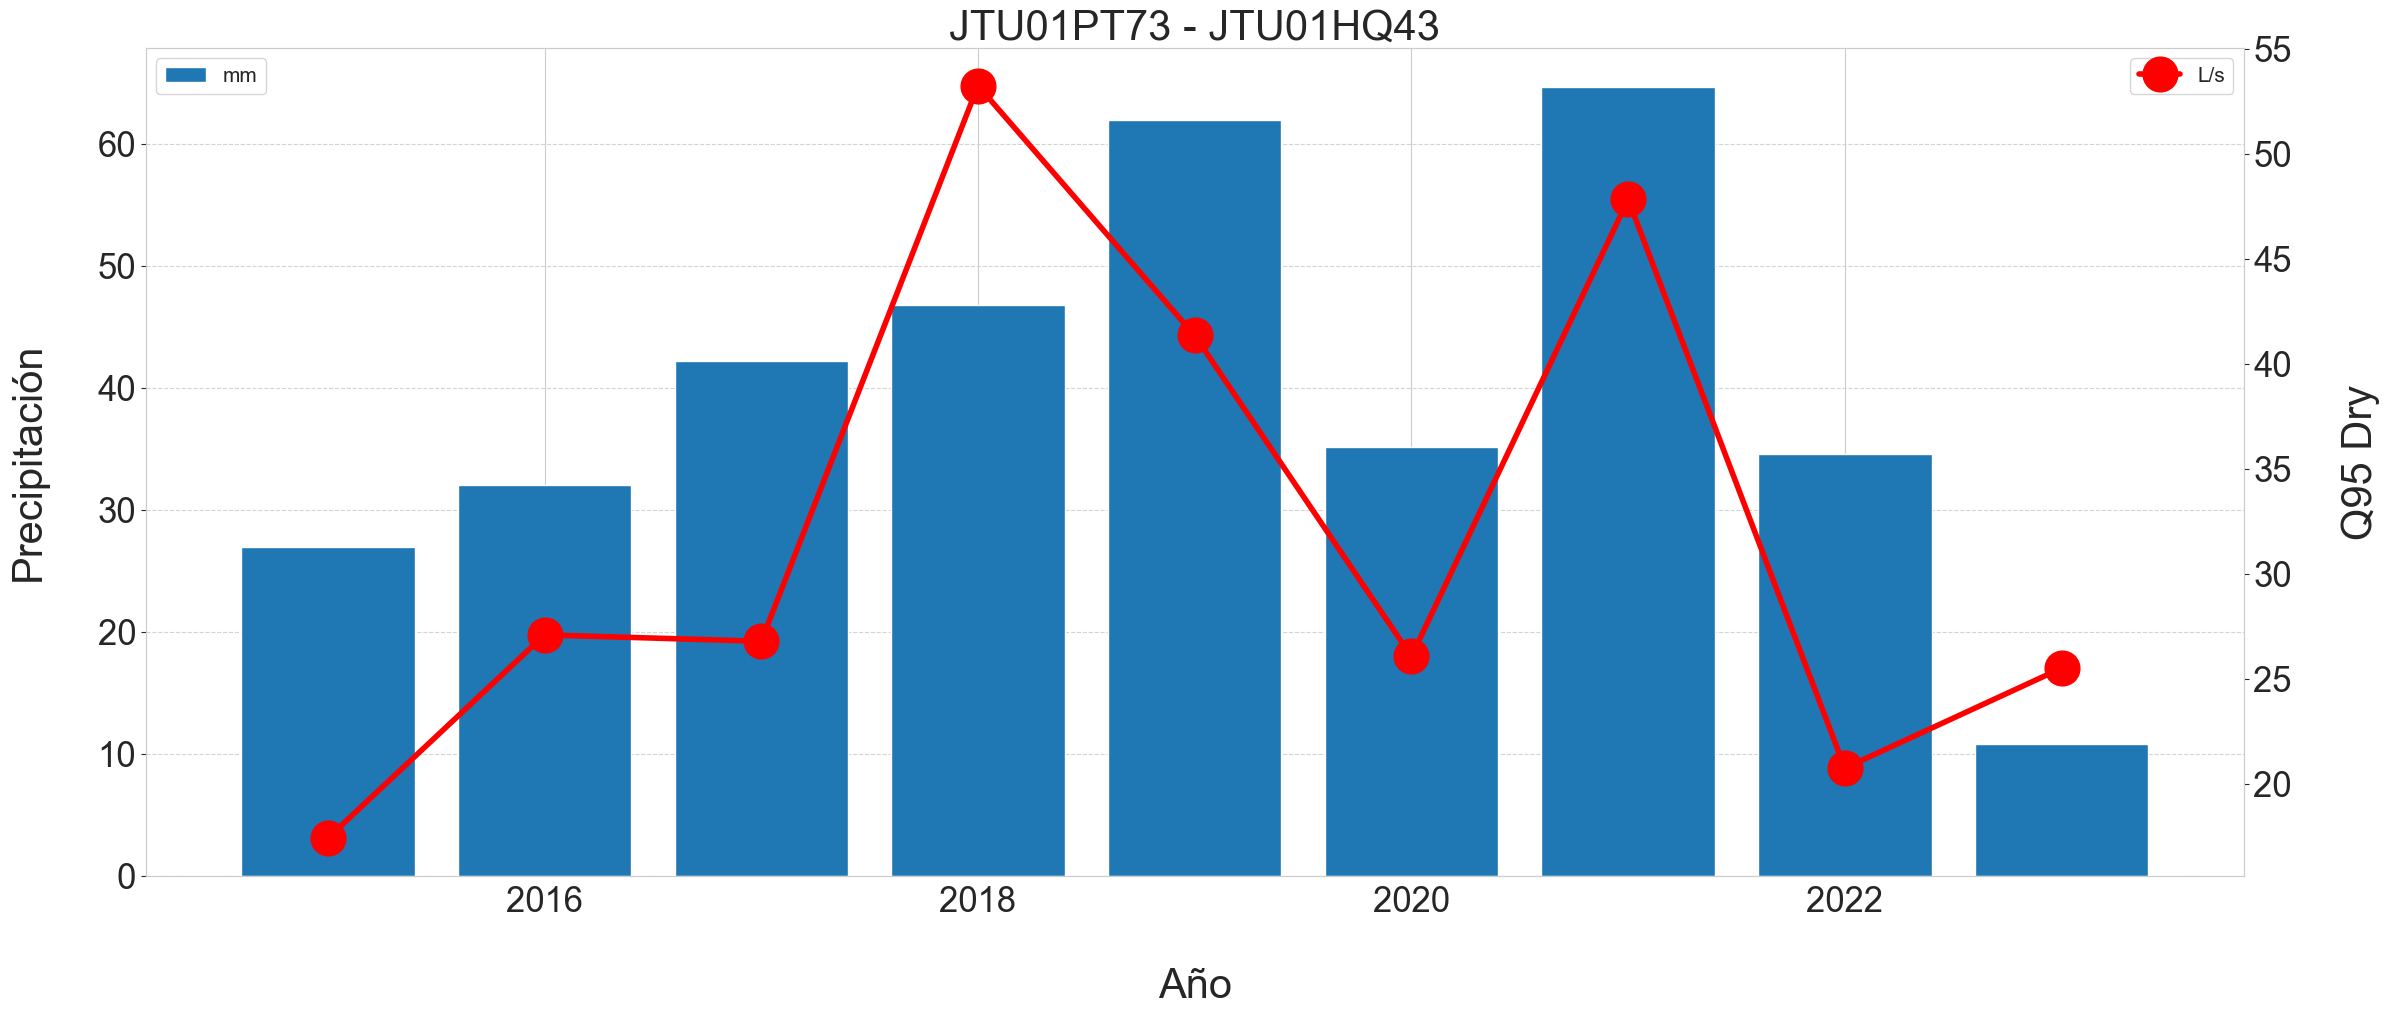

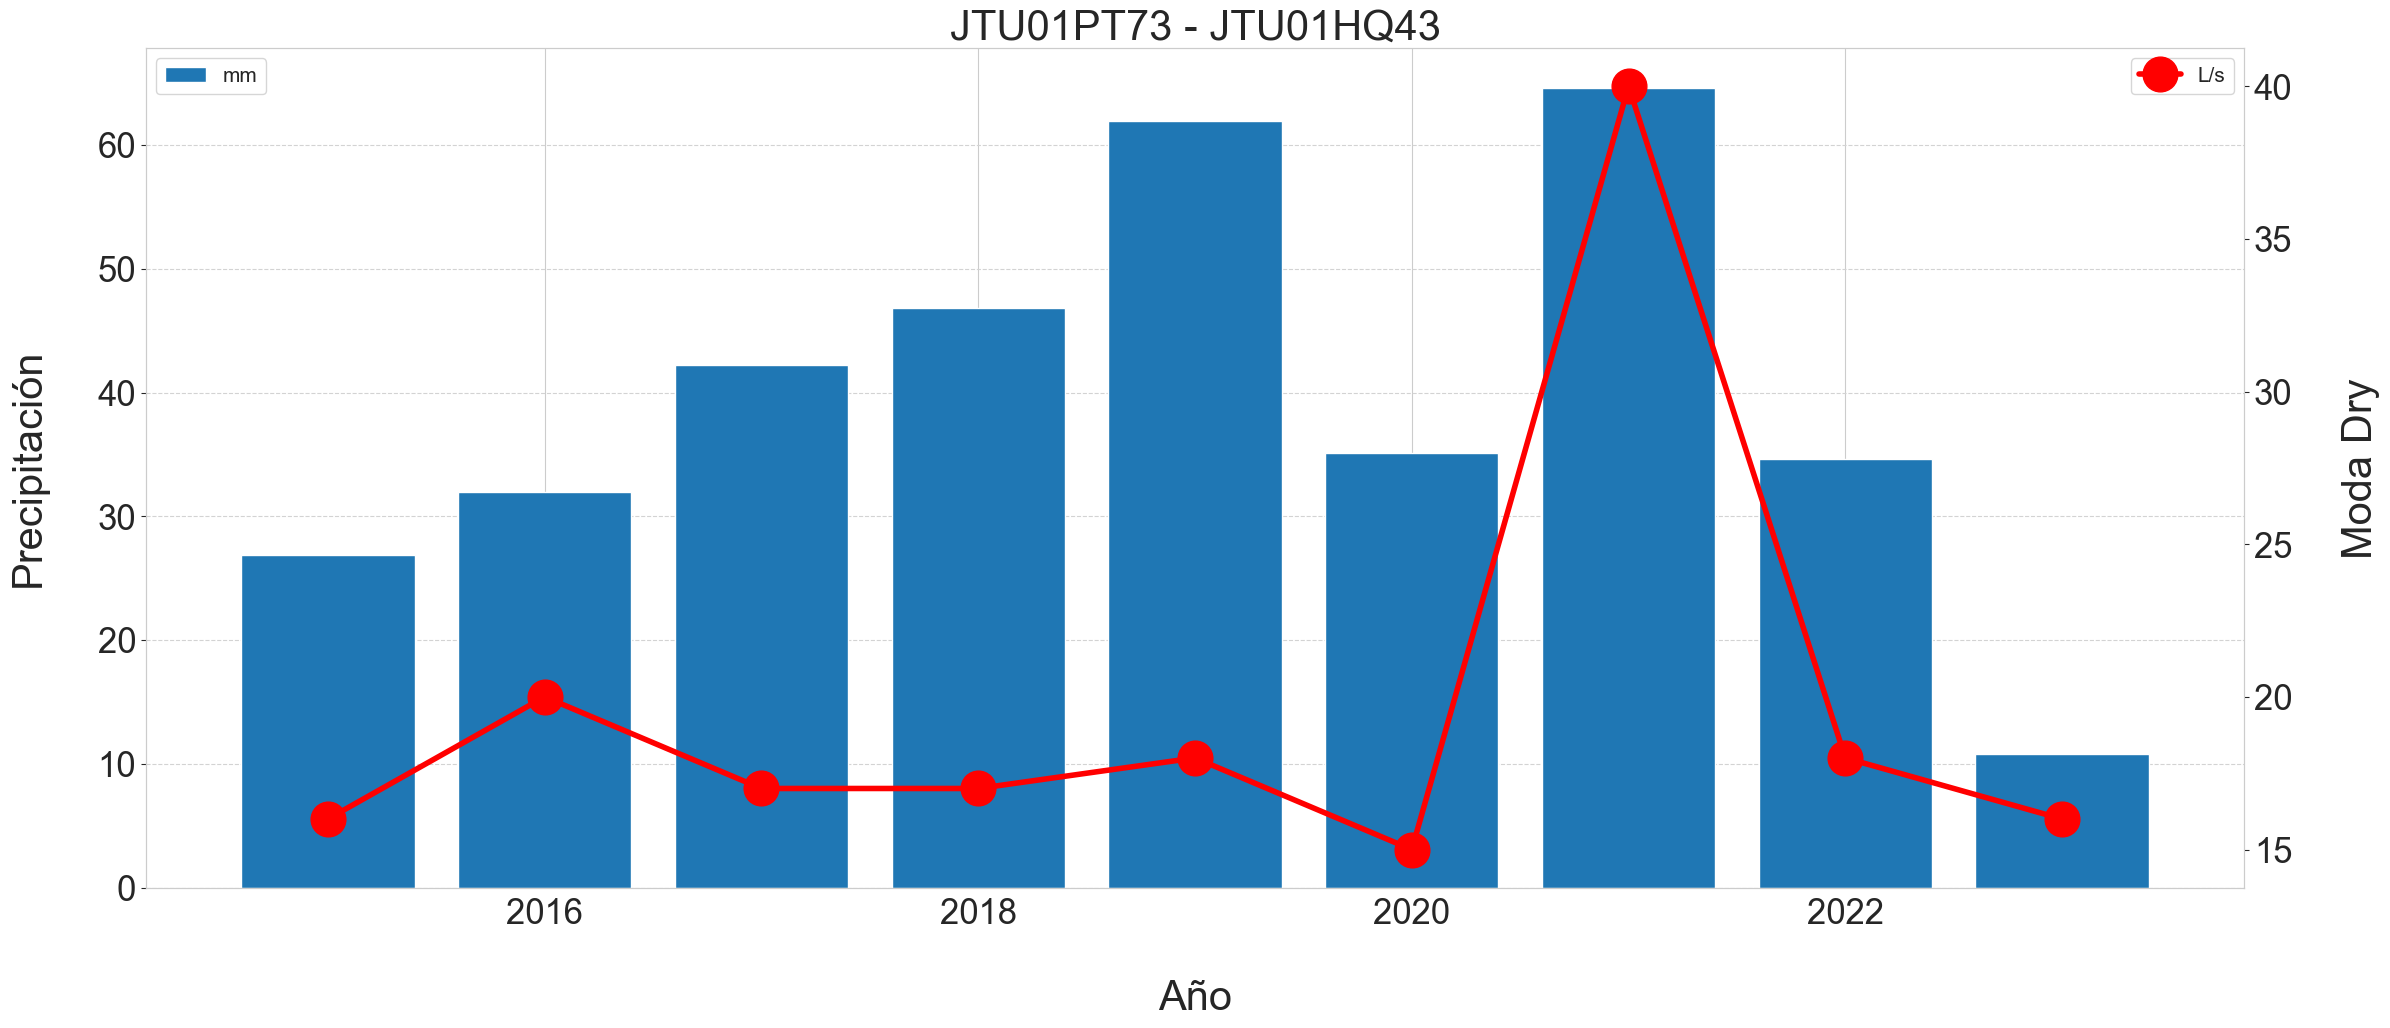

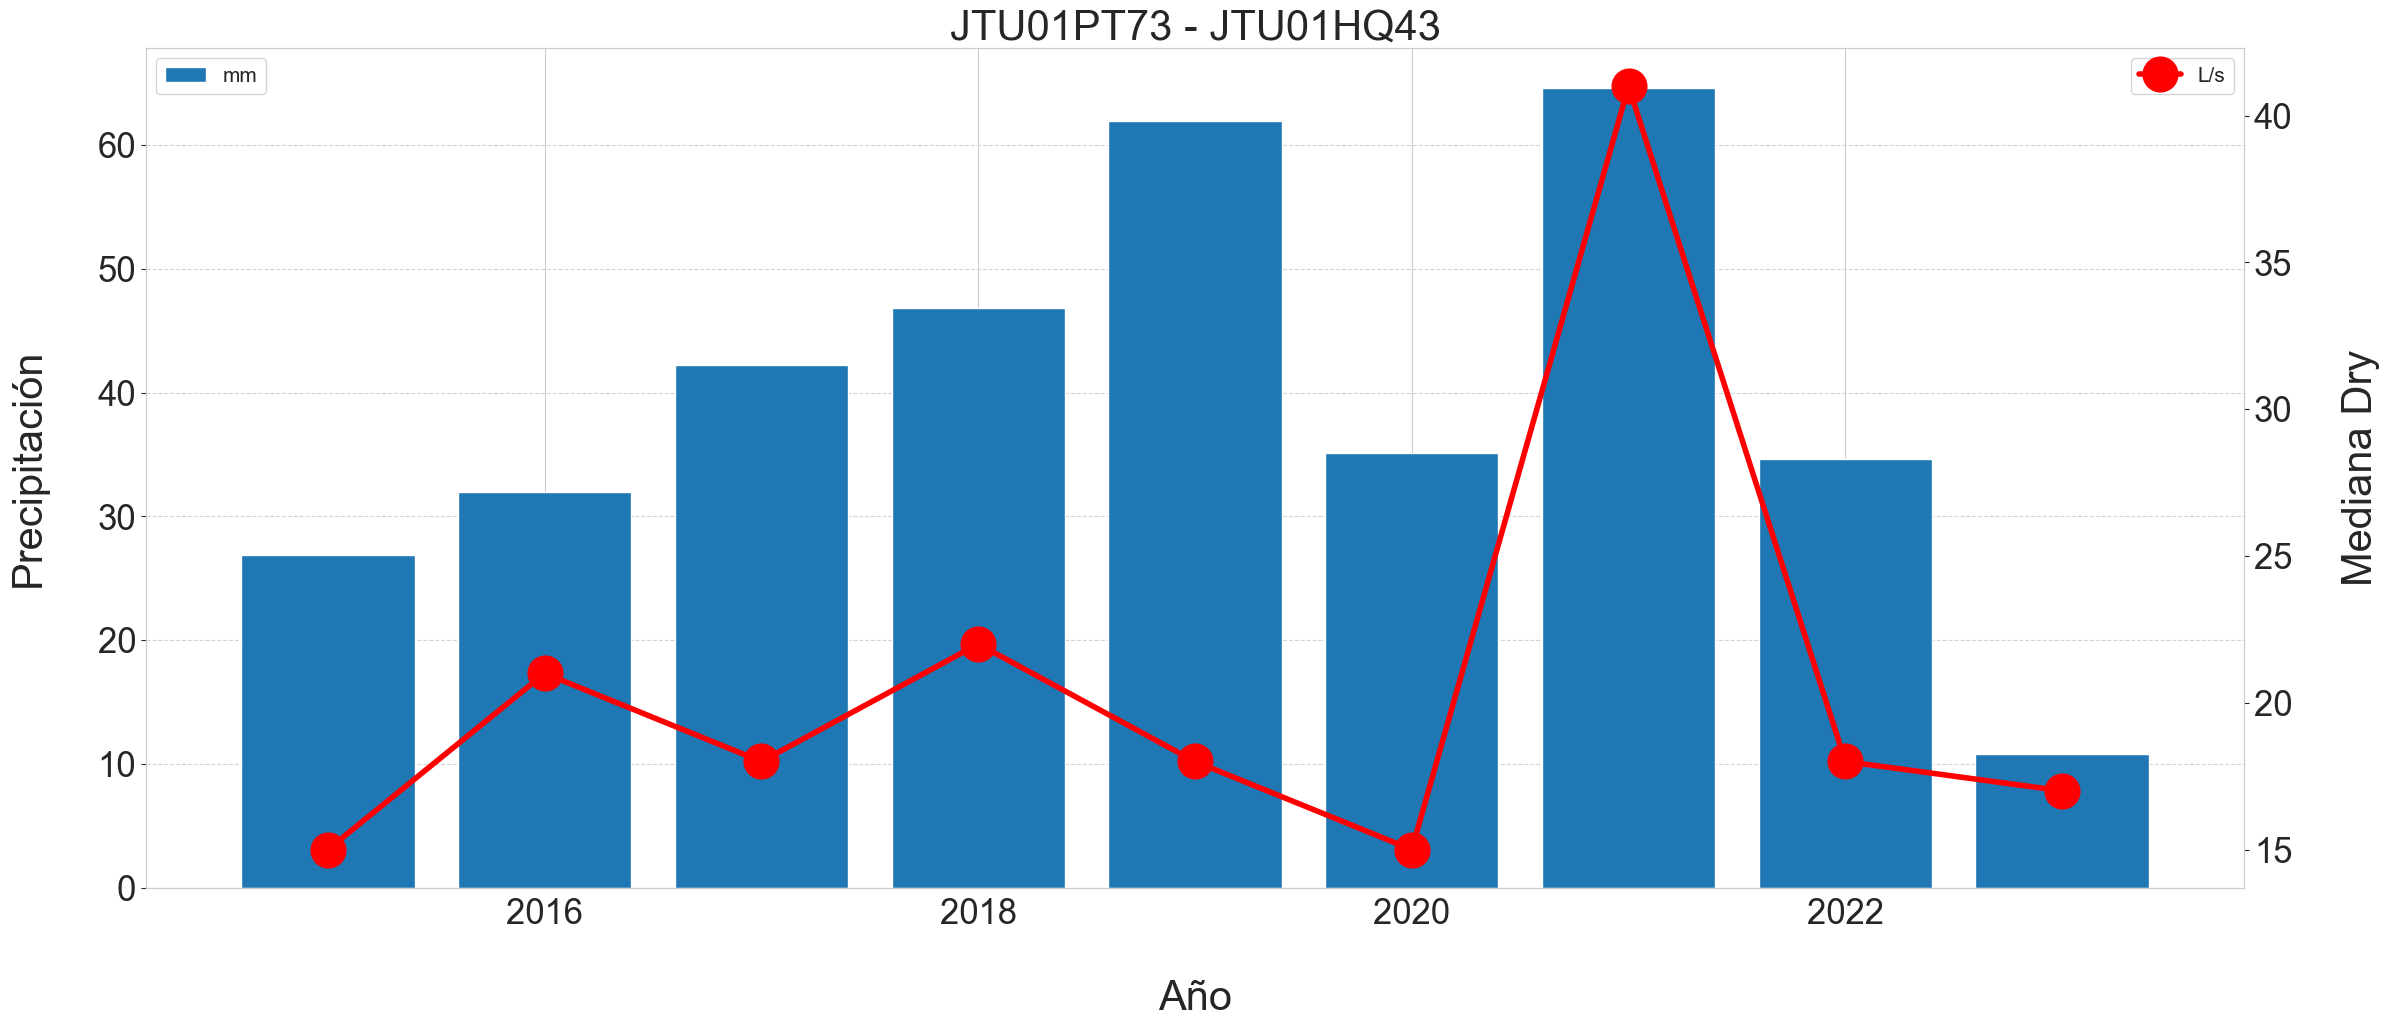

2011 2005

 (2012,)
    C11  mes
0   3.3    7
1  13.3    8
2  14.0    6
3  38.8    9
4  82.3    5
mes analizandose 7 mes anterior 6
precip 3.3

 (2013,)
     C11  mes
0    0.1    8
1    4.0    6
2    7.3    7
3   30.7    9
4  109.1    3
mes analizandose 8 mes anterior 7
precip 0.1

 (2014,)
    C11  mes
0   2.2    8
1   9.9    7
2  19.3    6
3  66.1    9
4  92.3    4
mes analizandose 8 mes anterior 7
precip 2.2

 (2015,)
    C11  mes
0  26.2    6
1  28.3    7
2  62.6    4
3  66.9    5
4  72.7    1
mes analizandose 6 mes anterior 5
precip 26.2

 (2016,)
    C11  mes
0   4.6    8
1   8.6    7
2  38.6    9
3  44.0    6
4  82.5   11
mes analizandose 8 mes anterior 7
precip 4.6

 (2017,)
     C11  mes
0    5.8    7
1   29.7    9
2   33.6    8
3  112.9    6
4  151.8   10
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
precip 29.7

 (2018,)
     C11  mes
0   25.0    8
1   29.6    6
2   53.0    7
3  114.1    1
4  124.8   10
mes analizandose 8 mes anterior 7
precip 25.0

 (2

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_18360\2546952341.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

     C11  mes
0   22.9    7
1   54.9    8
2   76.5    6
3  104.1    9
4  116.2    5
mes analizandose 7 mes anterior 6
precip 22.9

 (2022,)
     C11  mes
0   42.7    8
1  108.1    6
2  117.7    9
3  129.7    7
4  175.9   11
mes analizandose 8 mes anterior 7
mes analizandose 6 mes anterior 5
mes analizandose 9 mes anterior 8
mes analizandose 7 mes anterior 6
mes analizandose 11 mes anterior 10
Error

 (2023,)
    C11  mes
0  12.3    6
1  16.8   10
2  23.2    9
3  66.8    1
4  68.6   12
mes analizandose 6 mes anterior 5
mes analizandose 10 mes anterior 9
mes analizandose 9 mes anterior 8
mes analizandose 1 mes anterior 0
mes analizandose 12 mes anterior 11
Error


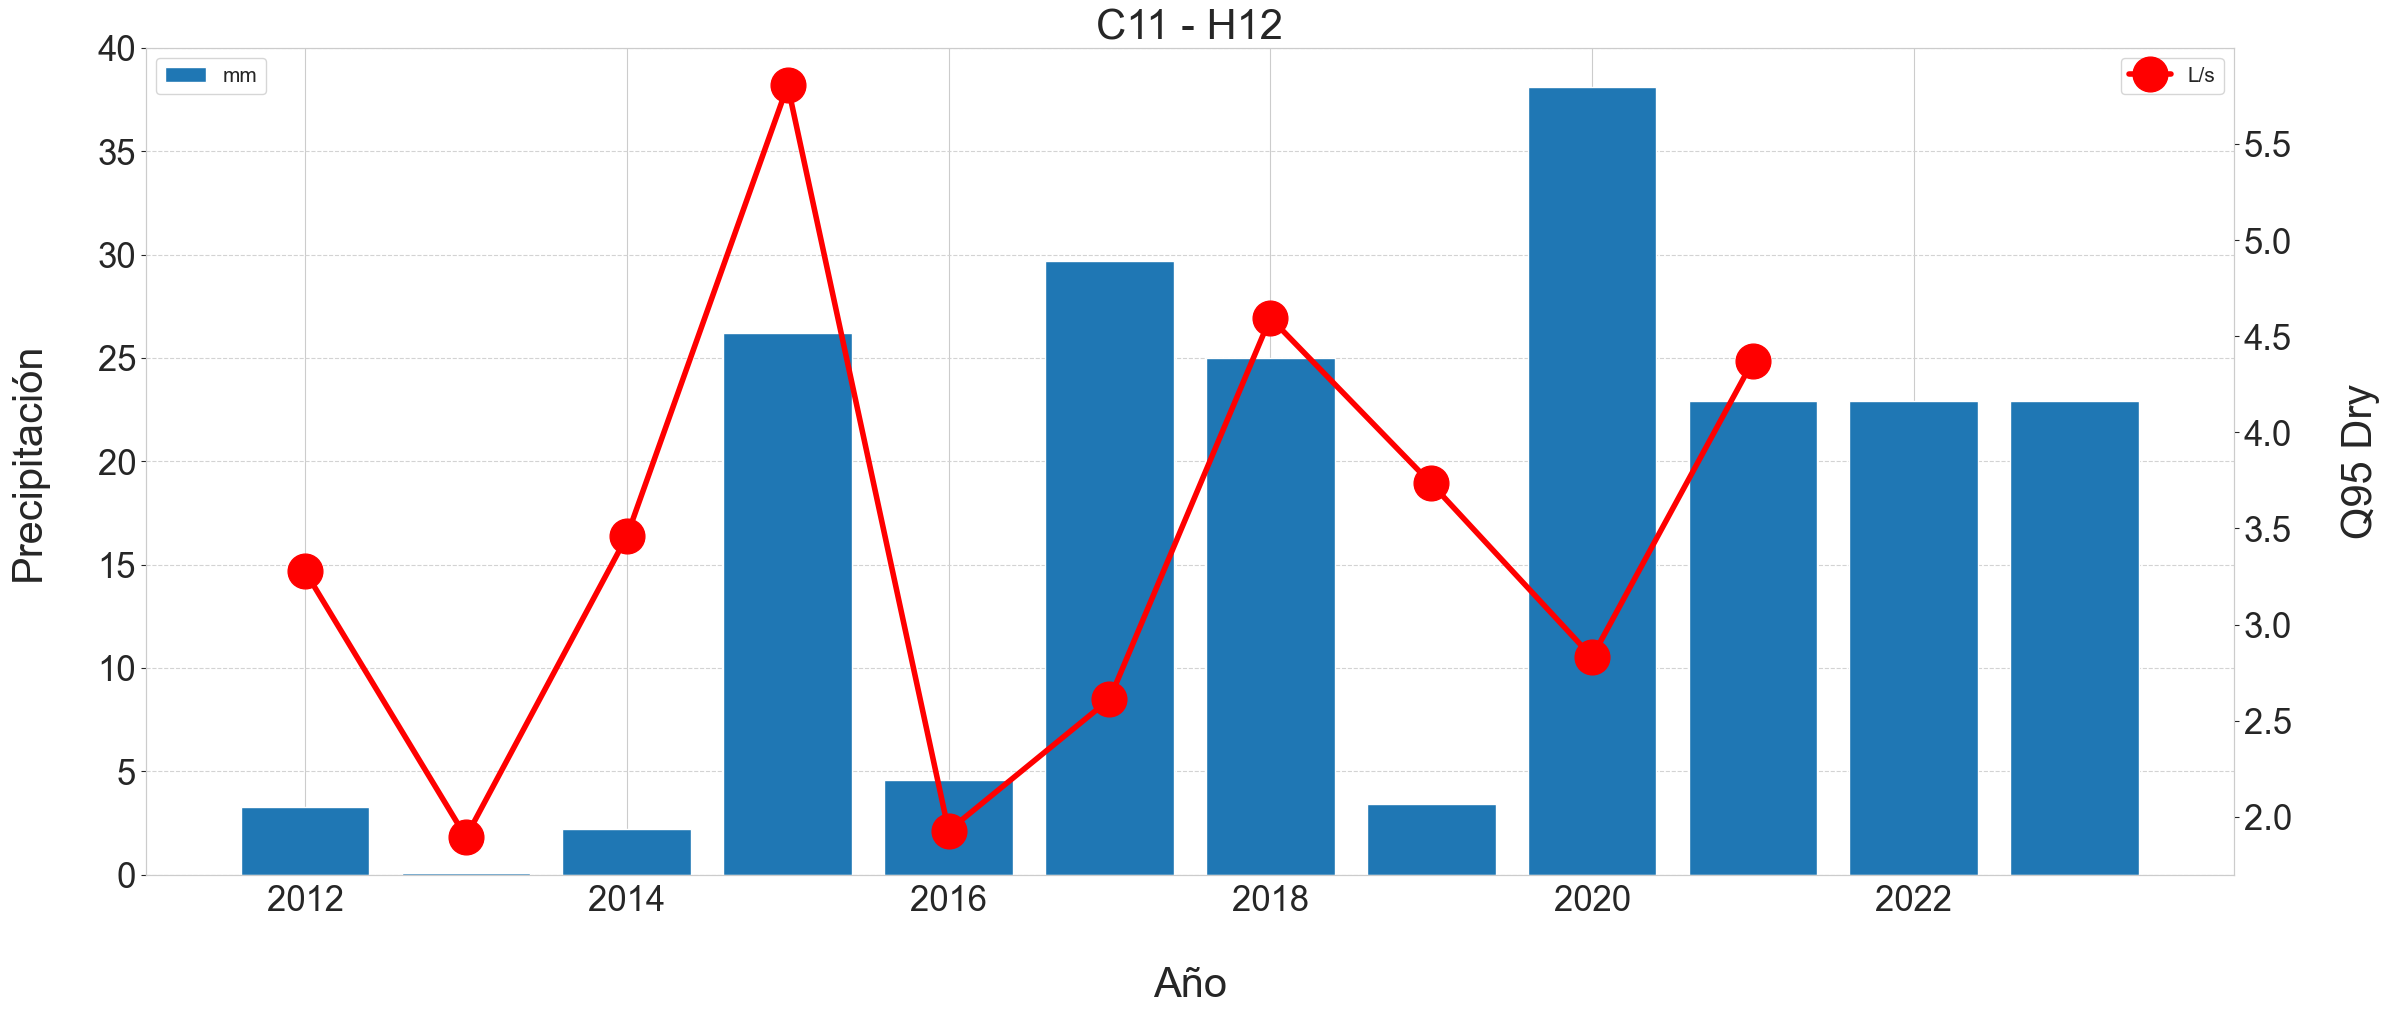

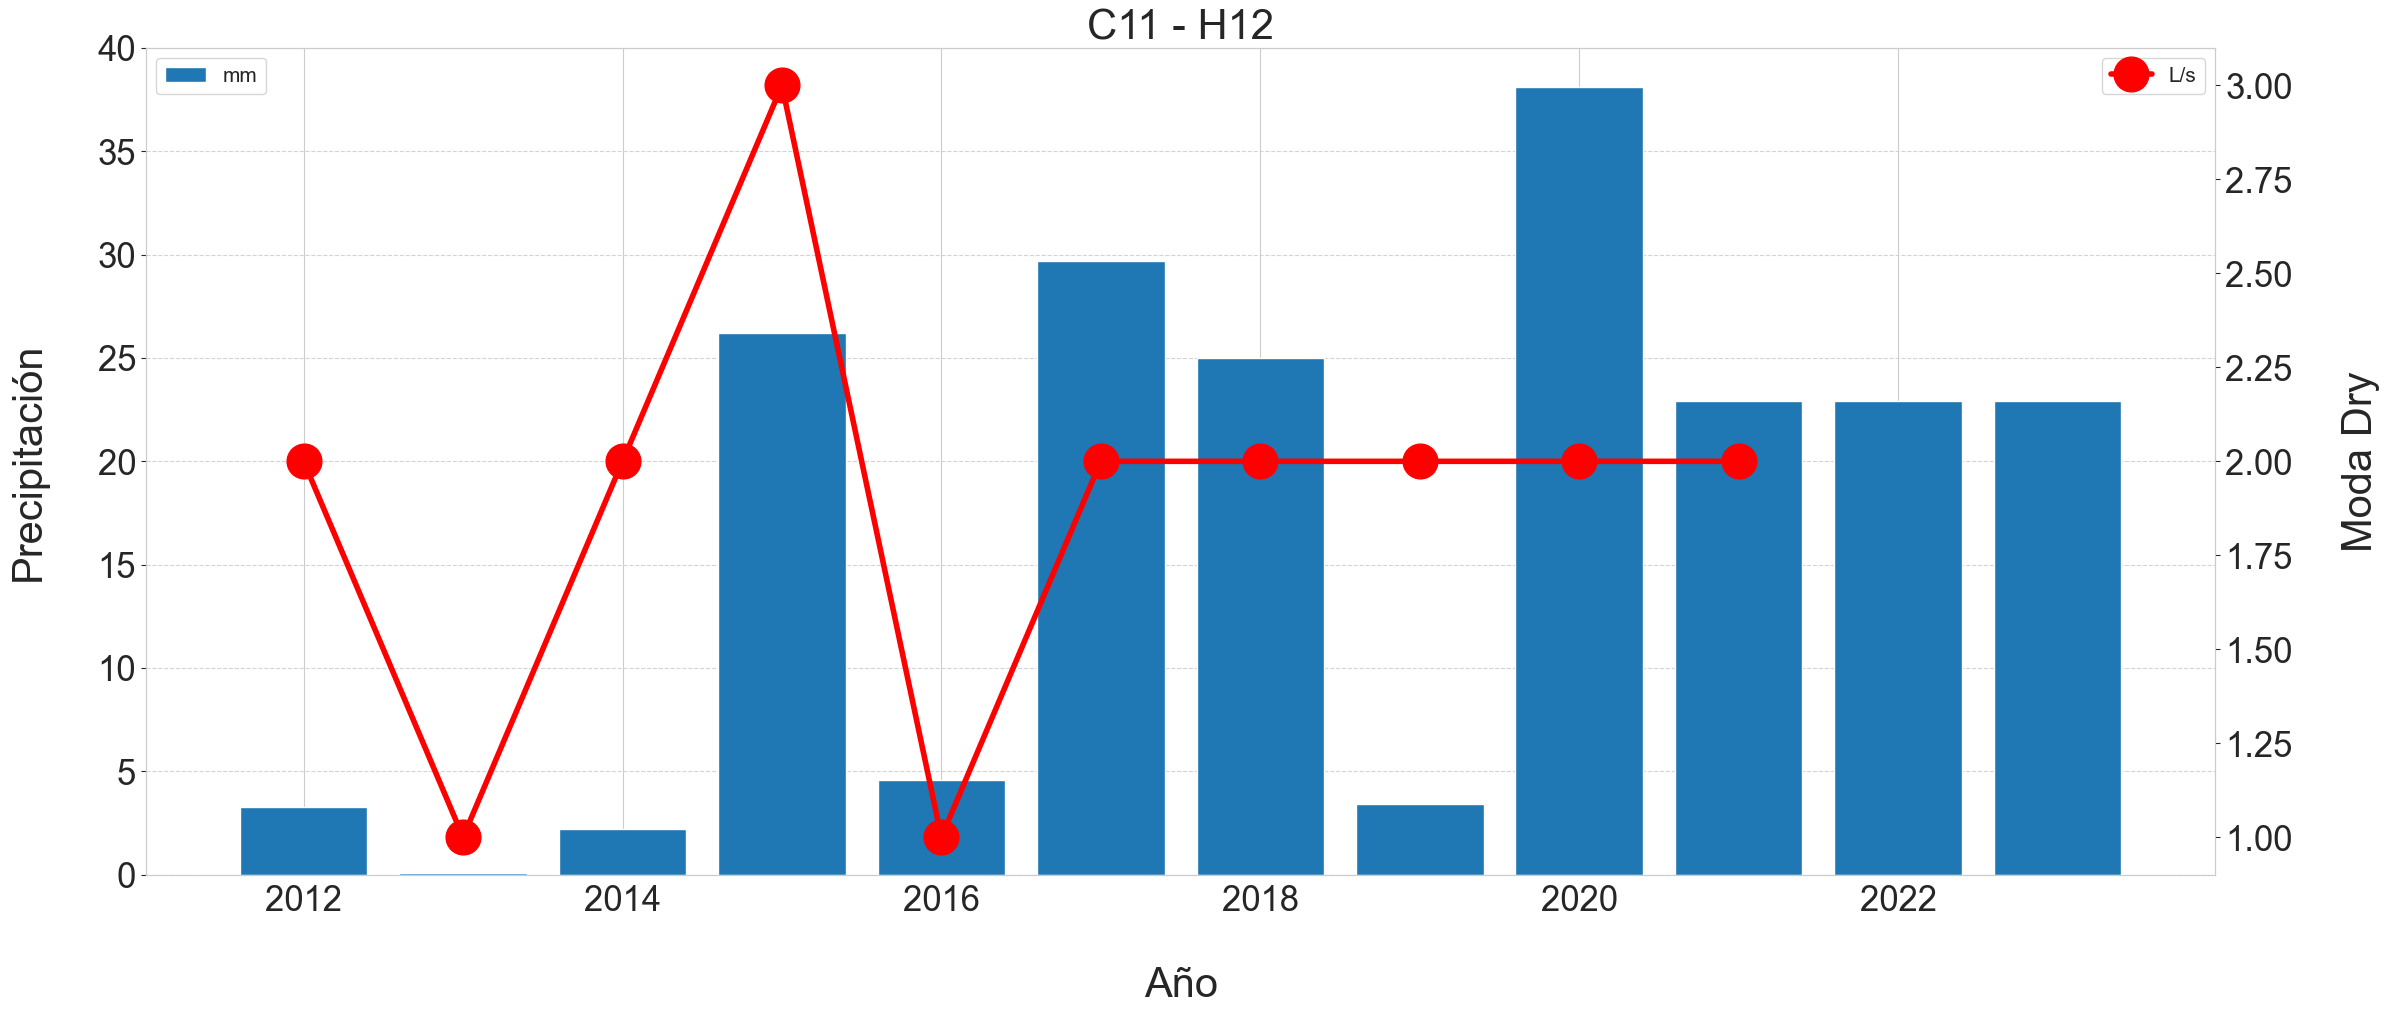

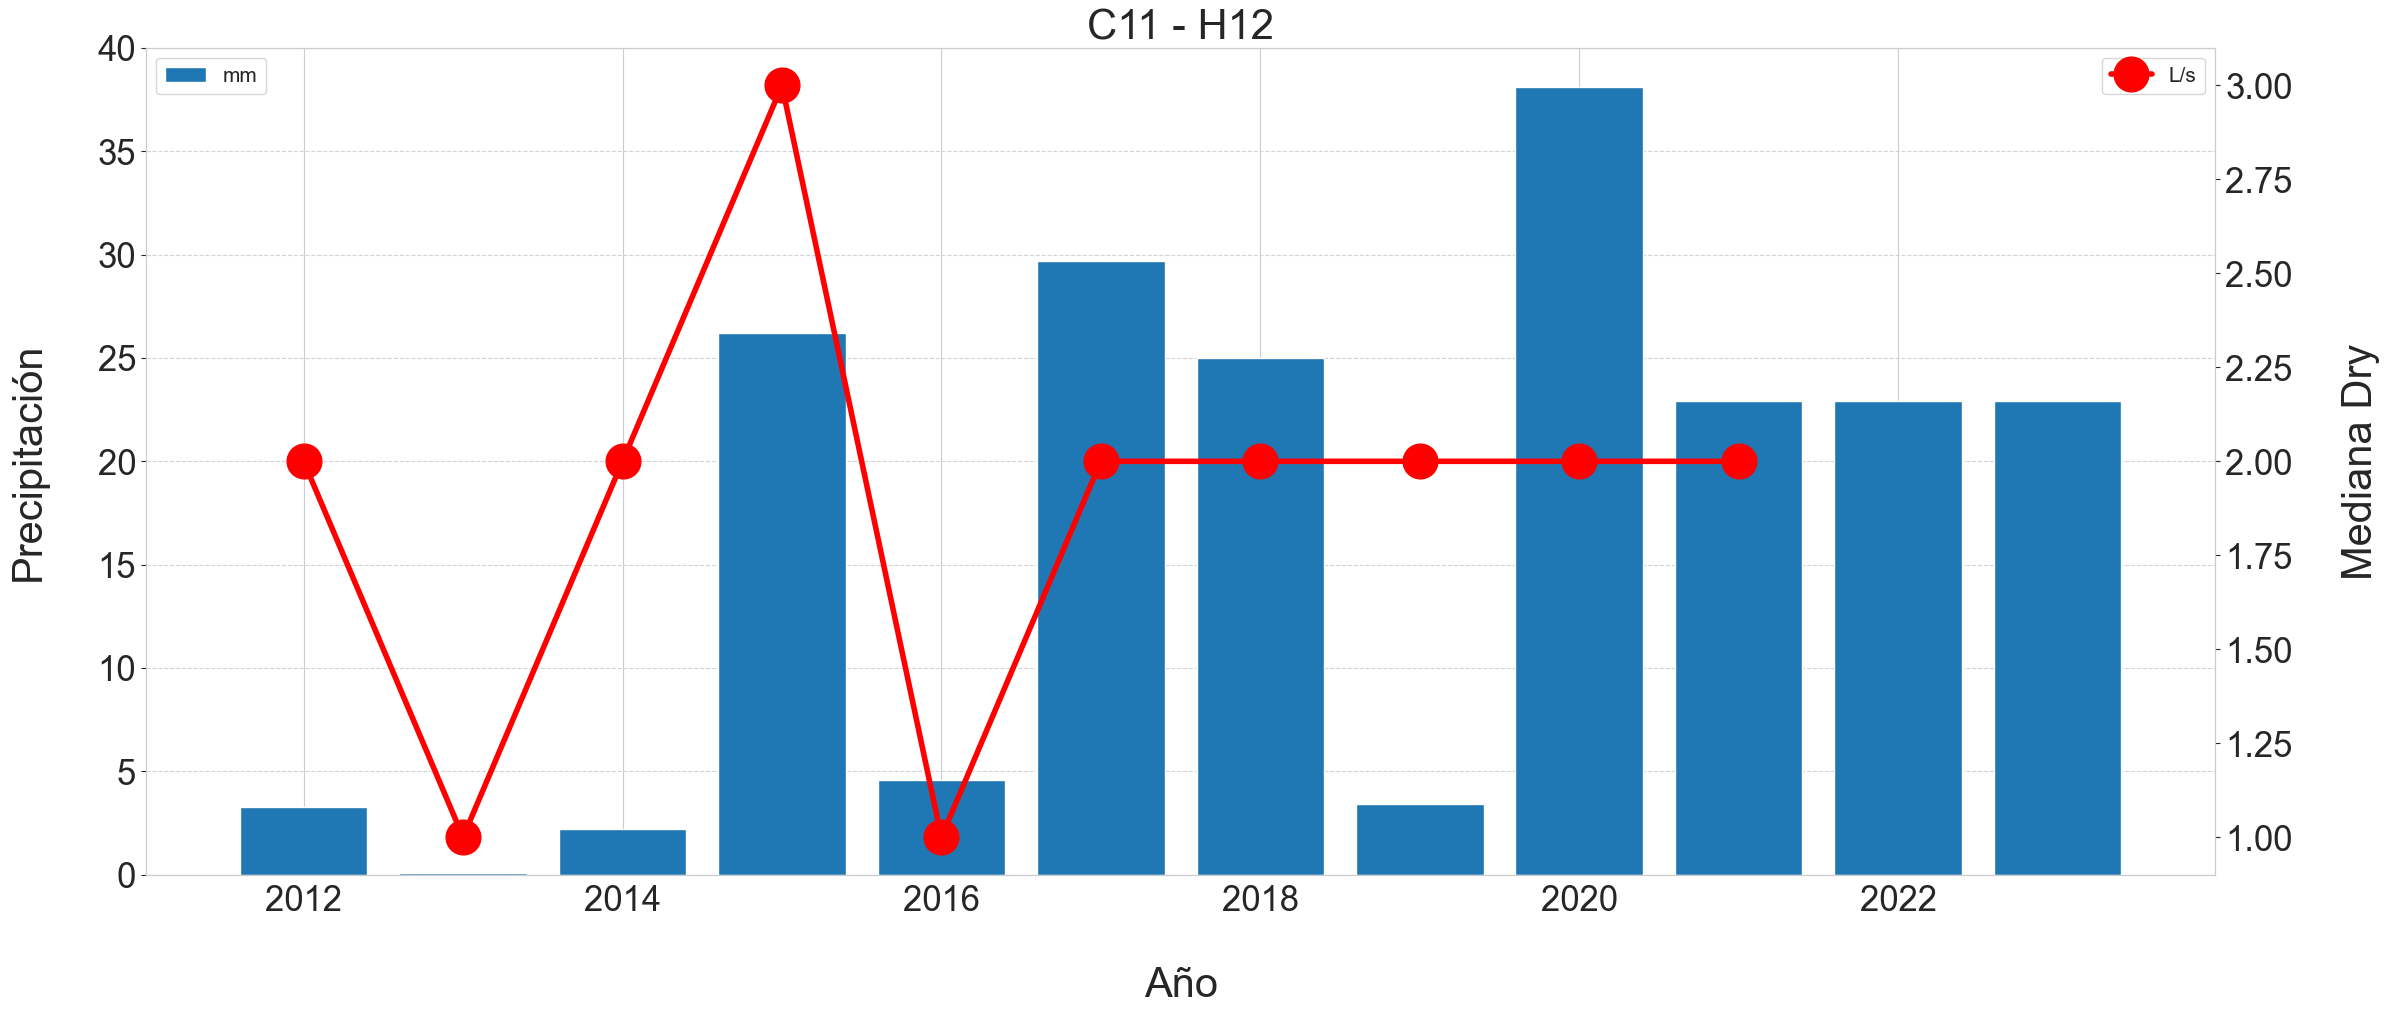

In [40]:
for precip_station, hidro_station in zip(["ATP01PT02","JTU01PT32","JTU01PT53","JTU01PT73","C11"],["ATP02HI01","JTU01HQ22","JTU01HQ32","JTU01HQ43","H12"]):
    
    min_date_p = precips_df[precip_station].dropna().index.year.min()
    min_date_q = caudales[hidro_station].dropna().index.year.min()
    min_date = max(min_date_p, min_date_q) +1

    print(min_date_p, min_date_q)

    pp = precips_df[precip_station].dropna().loc[precips_df[precip_station].dropna().index >= str(min_date)]
    precip_mensual_grouped = pp.groupby([pp.index.year])

    years = []
    precips =[]
    q95_dry = []
    moda_dry = []
    mediana_dry = []

    for year,pm in precip_mensual_grouped:
        years.append(year[0])

        print("\n",year)
        precip_ranked = pd.DataFrame(pm.sort_values())
        precip_ranked["mes"] = precip_ranked.index.month
        precip_ranked = precip_ranked.reset_index()
        precip_ranked = precip_ranked.drop("Fecha",axis=1)
        precip_ranked = precip_ranked.head(5)
        print(precip_ranked)

        acierto = False
        for mes in precip_ranked["mes"].values:
            print("mes analizandose",mes, "mes anterior",mes-1)

            q = caudales[hidro_station].loc[(caudales[hidro_station].index.year == year) & (caudales[hidro_station].index.month == mes)]
            q = q.dropna()

            if ((mes-1) in precip_ranked["mes"].values) and (len(q>570)):
                p = precip_ranked.loc[precip_ranked.mes == mes].values[0]
                precips.append(p[0])
                print("precip",p[0])

                q95_dry.append(np.percentile(q,95))

                moda = stats.mode(np.round(q,0))[0][0]
                moda_dry.append(moda)

                mediana_dry.append(np.round(np.median(q),0))
                acierto =True
                break

        if acierto == False:
            precips.append(p[0])

            q95_dry.append(np.nan)
            moda_dry.append(np.nan)
            mediana_dry.append(np.nan)
            print("Error")
            xxx = input("error")


    fig, ax = plt.subplots(figsize=(24,10))
    ax2 = ax.twinx()

    #ax.set_title('my title',size=25)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('\nAño',size=30)

    ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
    ax.set_ylabel('Precipitación\n',size=30)
    ax.legend(['mm'], loc='upper left',prop={'size': 15})

    ax2.plot(years,q95_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
    ax2.set_ylabel('\nQ95 Dry',size=30)
    ax2.legend(['L/s'], loc='upper right',prop={'size': 15})



    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    #plt.savefig(".pdf")
    #plt.savefig(".png")
    plt.title(precip_station+' - '+hidro_station,size=30)
    plt.grid(False)
    plt.show()

    fig, ax = plt.subplots(figsize=(24,10))
    ax2 = ax.twinx()

    #ax.set_title('my title',size=25)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('\nAño',size=30)

    ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
    ax.set_ylabel('Precipitación\n',size=30)
    ax.legend(['mm'], loc='upper left',prop={'size': 15})

    ax2.plot(years,moda_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
    ax2.set_ylabel('\nModa Dry',size=30)
    ax2.legend(['L/s'], loc='upper right',prop={'size': 15})

    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    #plt.savefig(".pdf")
    #plt.savefig(".png")
    plt.title(precip_station+' - '+hidro_station,size=30)
    plt.grid(False)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(24,10))
    ax2 = ax.twinx()

    #ax.set_title('my title',size=25)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('\nAño',size=30)

    ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
    ax.set_ylabel('Precipitación\n',size=30)
    ax.legend(['mm'], loc='upper left',prop={'size': 15})

    ax2.plot(years,mediana_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
    ax2.set_ylabel('\nMediana Dry',size=30)
    ax2.legend(['L/s'], loc='upper right',prop={'size': 15})

    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    #plt.savefig(".pdf")
    #plt.savefig(".png")
    plt.title(precip_station+' - '+hidro_station,size=30)
    plt.grid(False)
    plt.show()        

        

2017 2017

 (2018,)
   ATP01PT02  mes
0       44.3    3
1       52.1   12
2       55.3    7
3       58.7    9
4       69.8    6
mes analizandose 3 mes anterior 2
mes analizandose 12 mes anterior 11
mes analizandose 7 mes anterior 6
precip 55.3

 (2019,)
   ATP01PT02  mes
0       60.5    8
1       65.6    9
2       71.9    4
3       73.6    7
4       79.5    3
mes analizandose 8 mes anterior 7
precip 60.5

 (2020,)
   ATP01PT02  mes
0       43.4    3
1       49.3    8
2       58.3   10
3       60.6    2
4       82.4    4
mes analizandose 3 mes anterior 2
precip 43.4

 (2021,)
   ATP01PT02  mes
0       48.5    8
1       73.6    1
2       82.1    7
3       84.6    6
4       92.8   12
mes analizandose 8 mes anterior 7
precip 48.5

 (2022,)
   ATP01PT02  mes
0       38.2    9
1       63.1   11
2       71.5    1
3       82.4    8
4       91.7    5
mes analizandose 9 mes anterior 8
precip 38.2

 (2023,)
   ATP01PT02  mes
0       37.1    9
1       43.2   10
2       54.0    6
3       64.1    8


C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

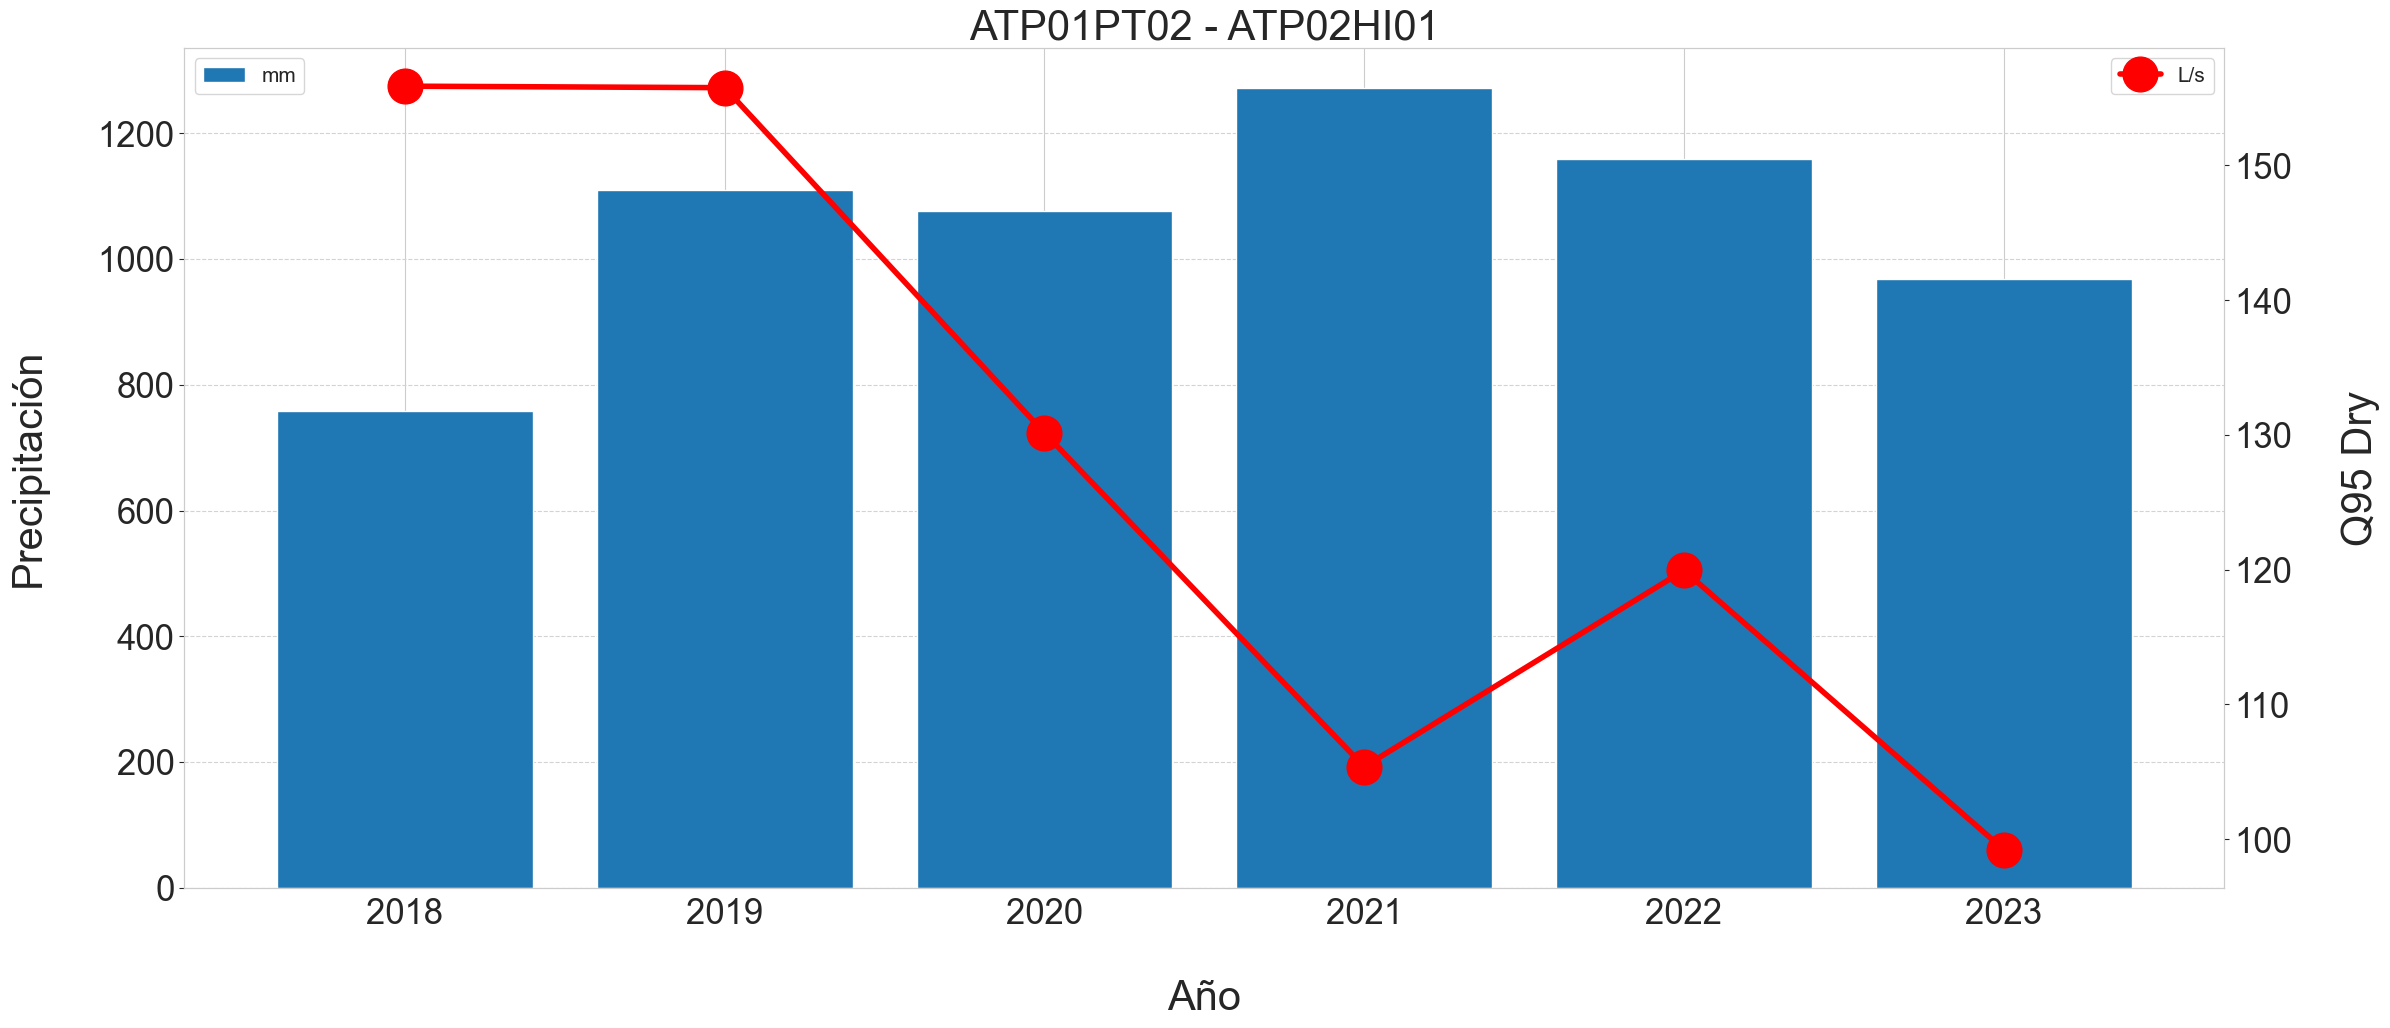

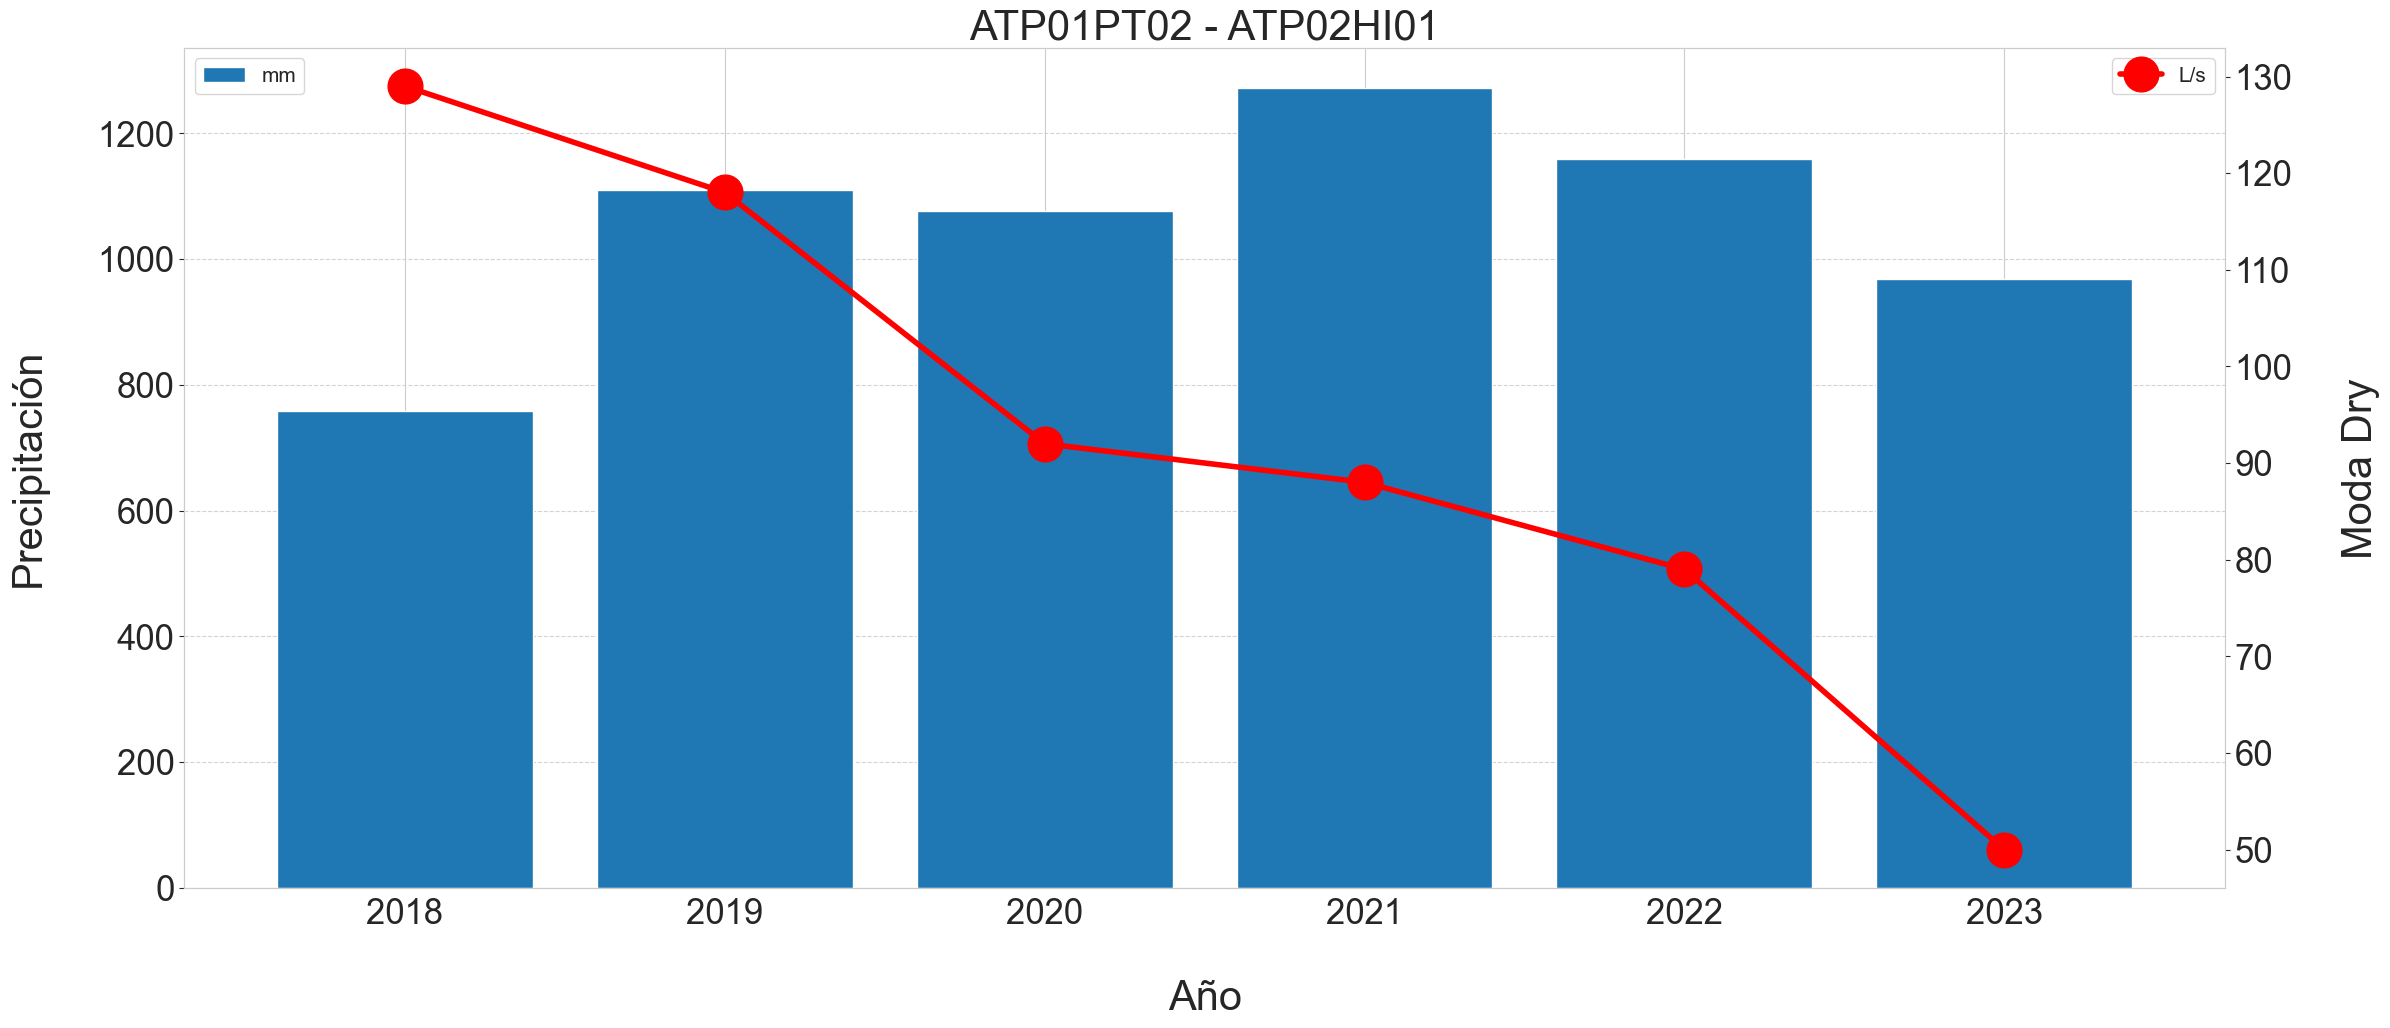

2013 2013

 (2014,)
   JTU01PT32  mes
0       27.8    7
1       45.6    9
2       52.5   12
3       56.1    6
4      102.3    5
mes analizandose 7 mes anterior 6
precip 27.8

 (2015,)
   JTU01PT32  mes
0       12.1   12
1       13.8    9
2       19.1    8
3       40.5    5
4       45.6    4
mes analizandose 12 mes anterior 11
mes analizandose 9 mes anterior 8
precip 13.8

 (2016,)
   JTU01PT32  mes
0        9.4    8
1       15.7    2
2       25.7    7
3       32.4    1
4       44.0    5
mes analizandose 8 mes anterior 7
precip 9.4

 (2017,)
   JTU01PT32  mes
0       21.3    7
1       37.8    9
2       47.6    8
3       63.6   10
4       69.2    4
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
precip 37.8

 (2018,)
   JTU01PT32  mes
0       26.4    7
1       30.2    6
2       32.3    8
3       49.7    3
4       53.2    9
mes analizandose 7 mes anterior 6
precip 26.4

 (2019,)
   JTU01PT32  mes
0       26.0    8
1       36.8    7
2       44.0    6
3       47.9    1
4

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

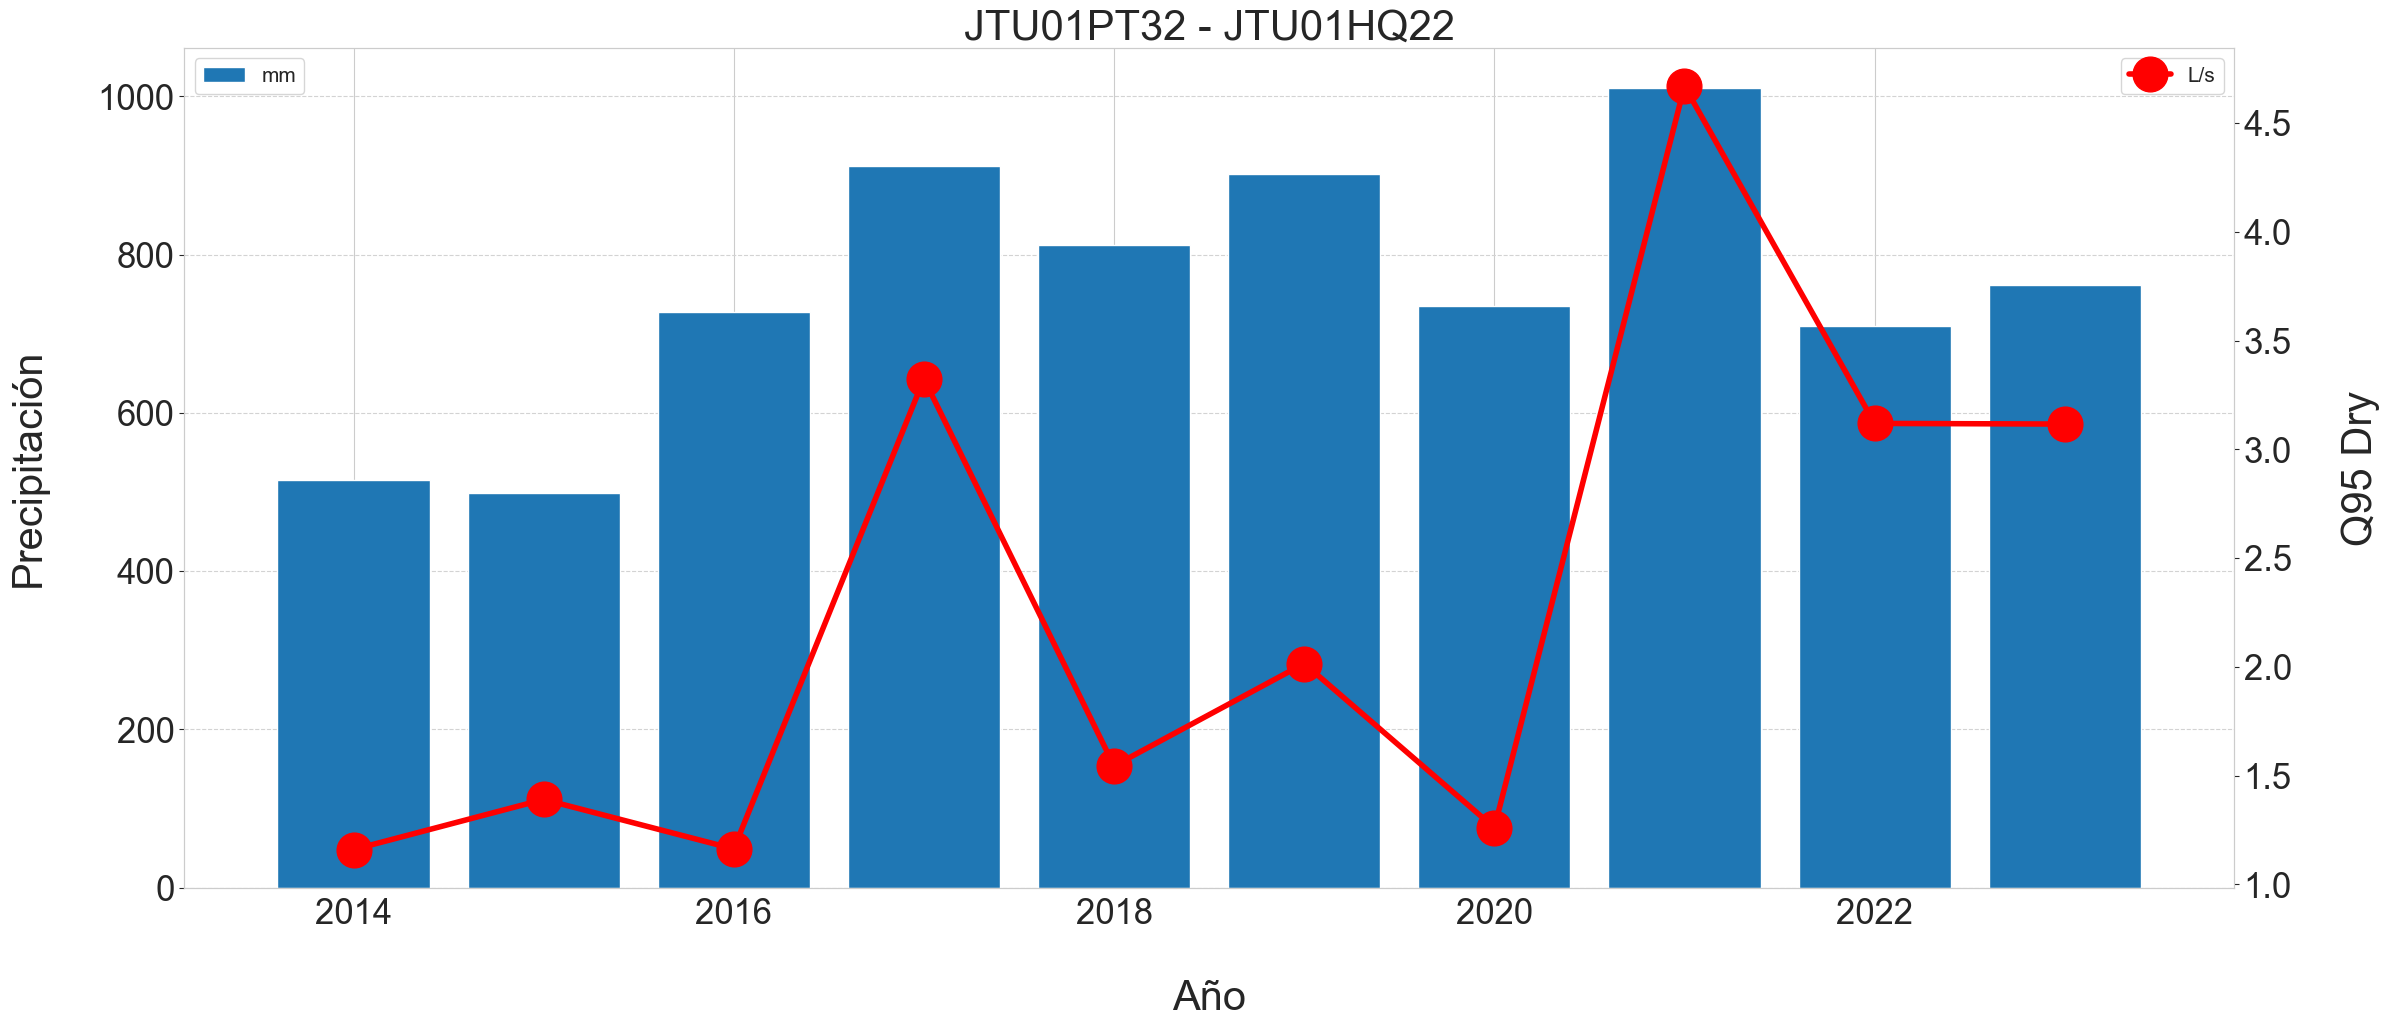

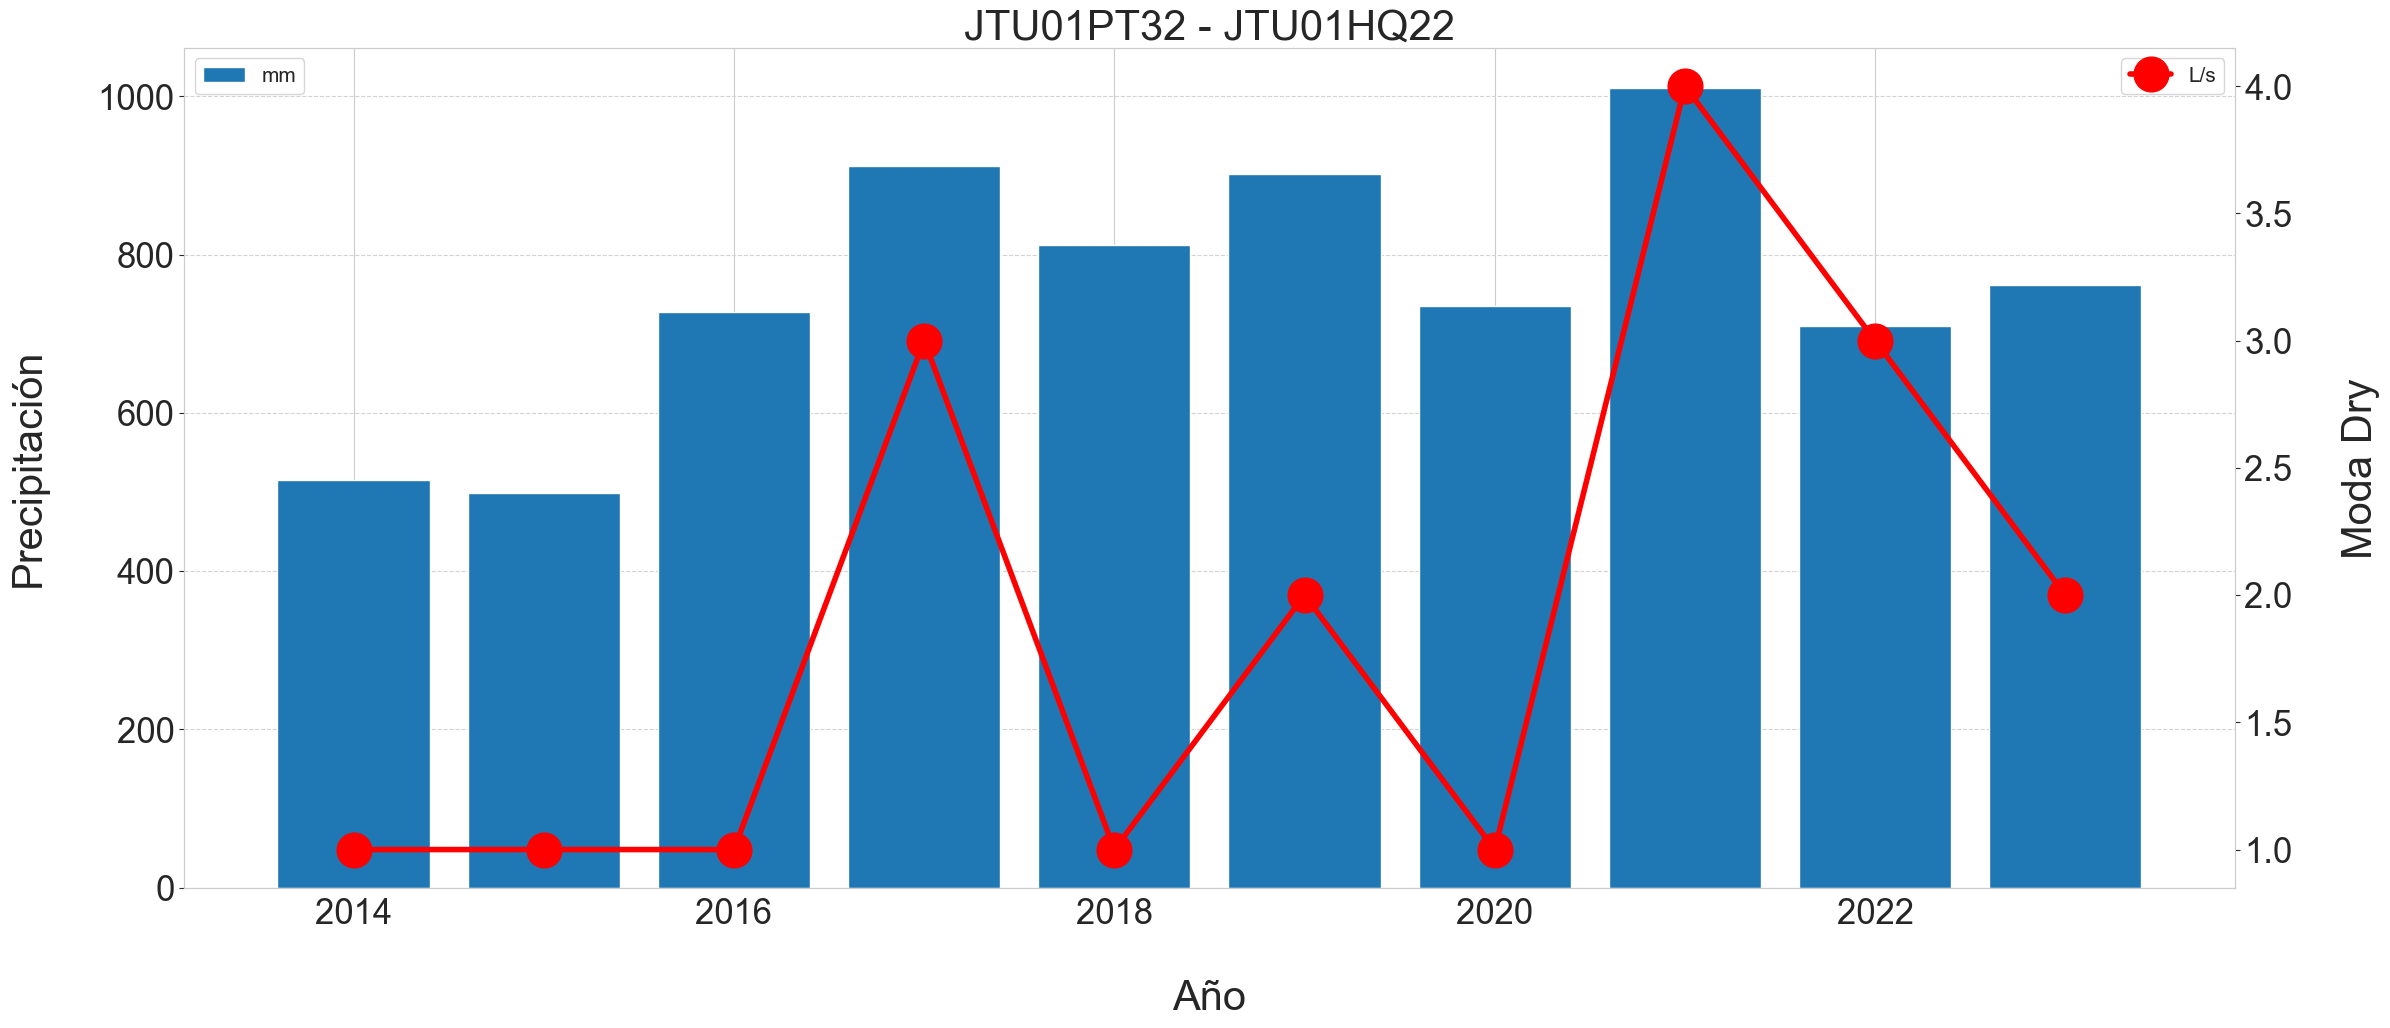

2014 2013

 (2015,)
   JTU01PT53  mes
0       16.8   12
1       44.2    1
2       51.9    6
3       55.1    2
4       58.9    7
mes analizandose 12 mes anterior 11
mes analizandose 1 mes anterior 0
mes analizandose 6 mes anterior 5
mes analizandose 2 mes anterior 1
precip 55.1

 (2016,)
   JTU01PT53  mes
0       19.9    8
1       31.5    2
2       36.5    1
3       36.5    7
4       45.4    5
mes analizandose 8 mes anterior 7
precip 19.9

 (2017,)
   JTU01PT53  mes
0       18.2    7
1       34.6    9
2       48.2    8
3       74.5    2
4       75.5   12
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
mes analizandose 8 mes anterior 7
precip 48.2

 (2018,)
   JTU01PT53  mes
0       33.4    8
1       35.3    6
2       36.7    7
3       53.5   10
4       57.0    9
mes analizandose 8 mes anterior 7
precip 33.4

 (2019,)
   JTU01PT53  mes
0       24.5    8
1       58.6    7
2       60.1    6
3       63.8    9
4       67.6    1
mes analizandose 8 mes anterior 7
precip 24.

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

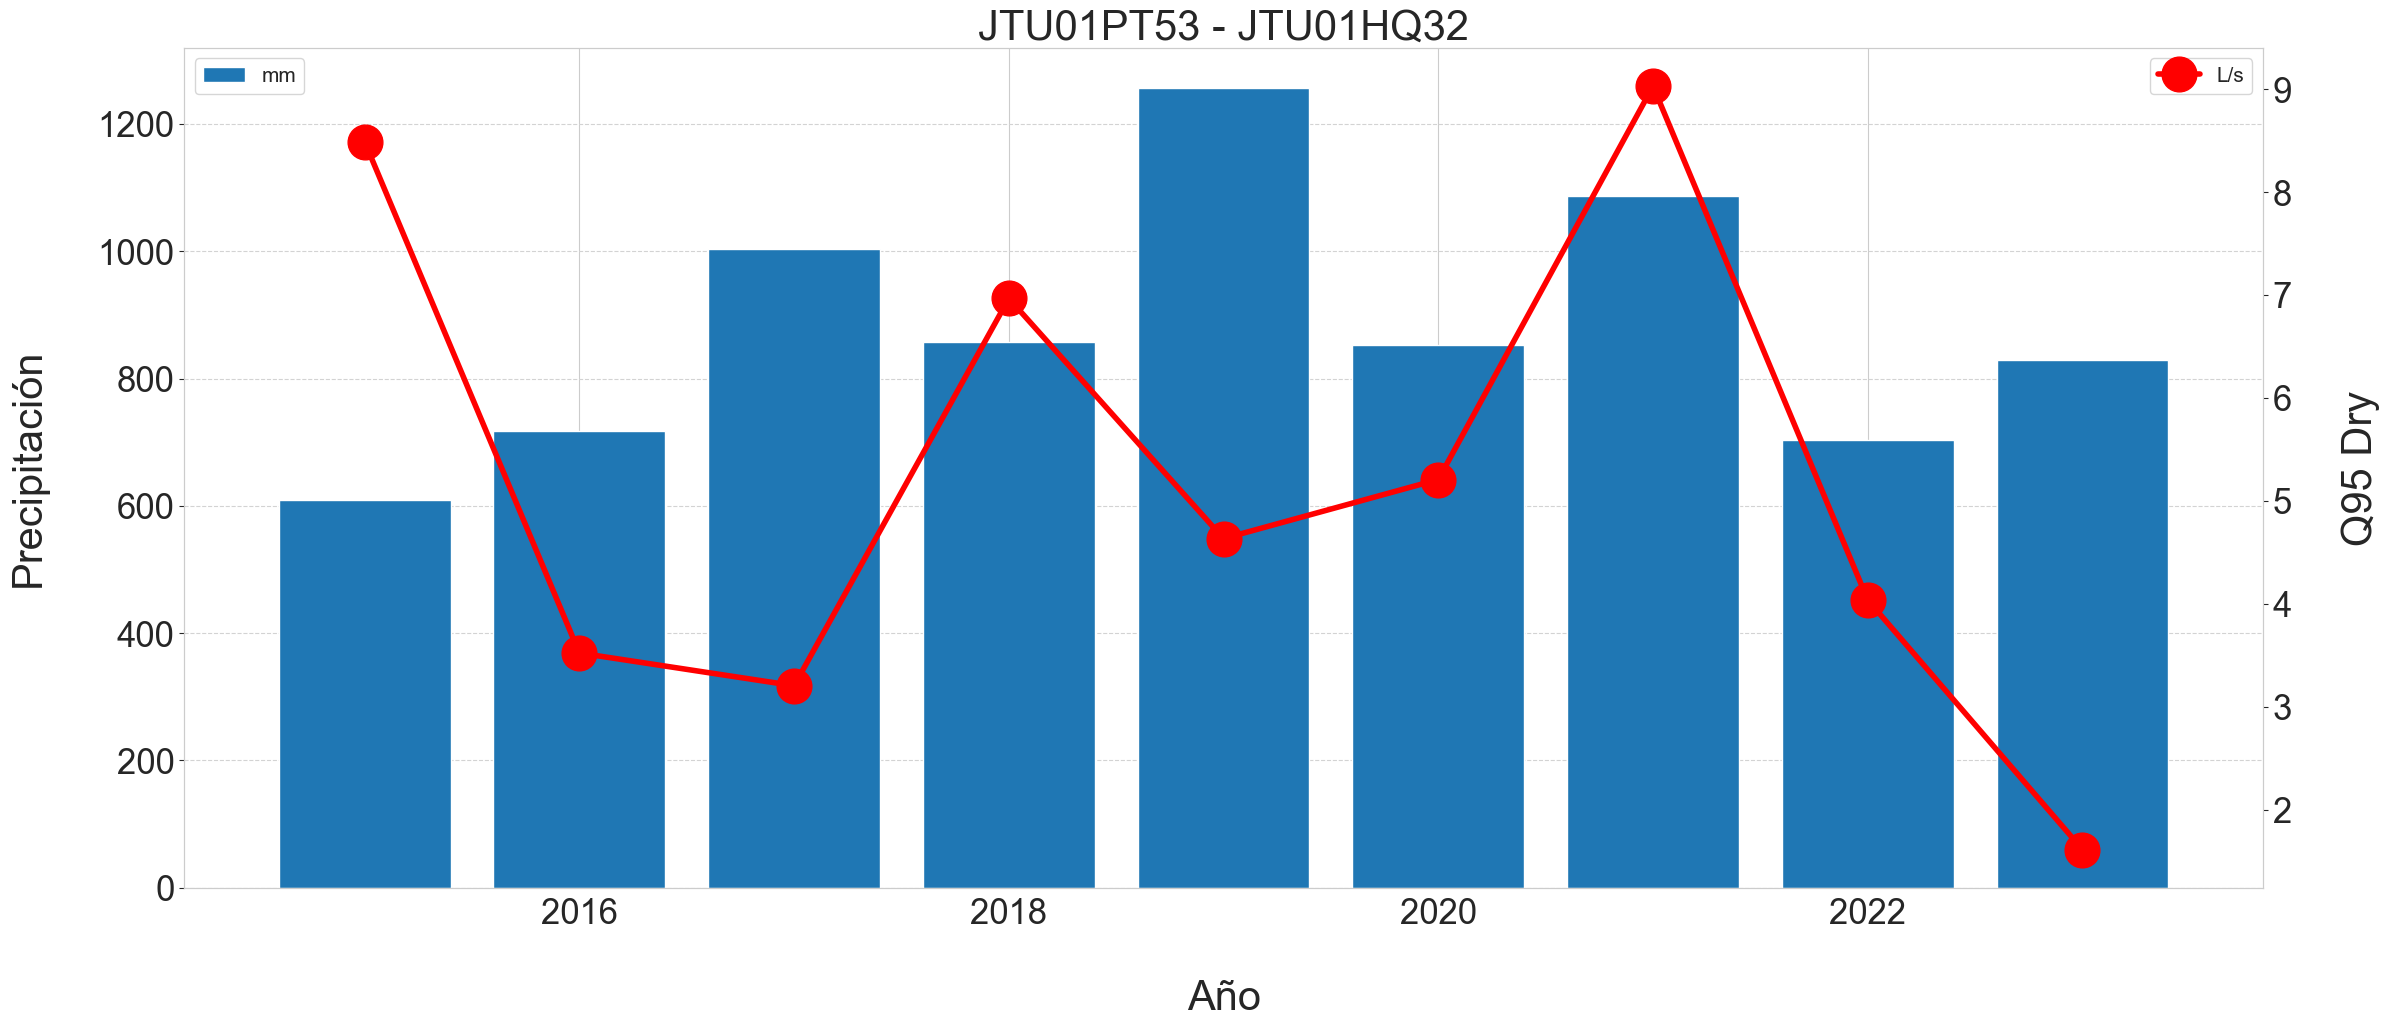

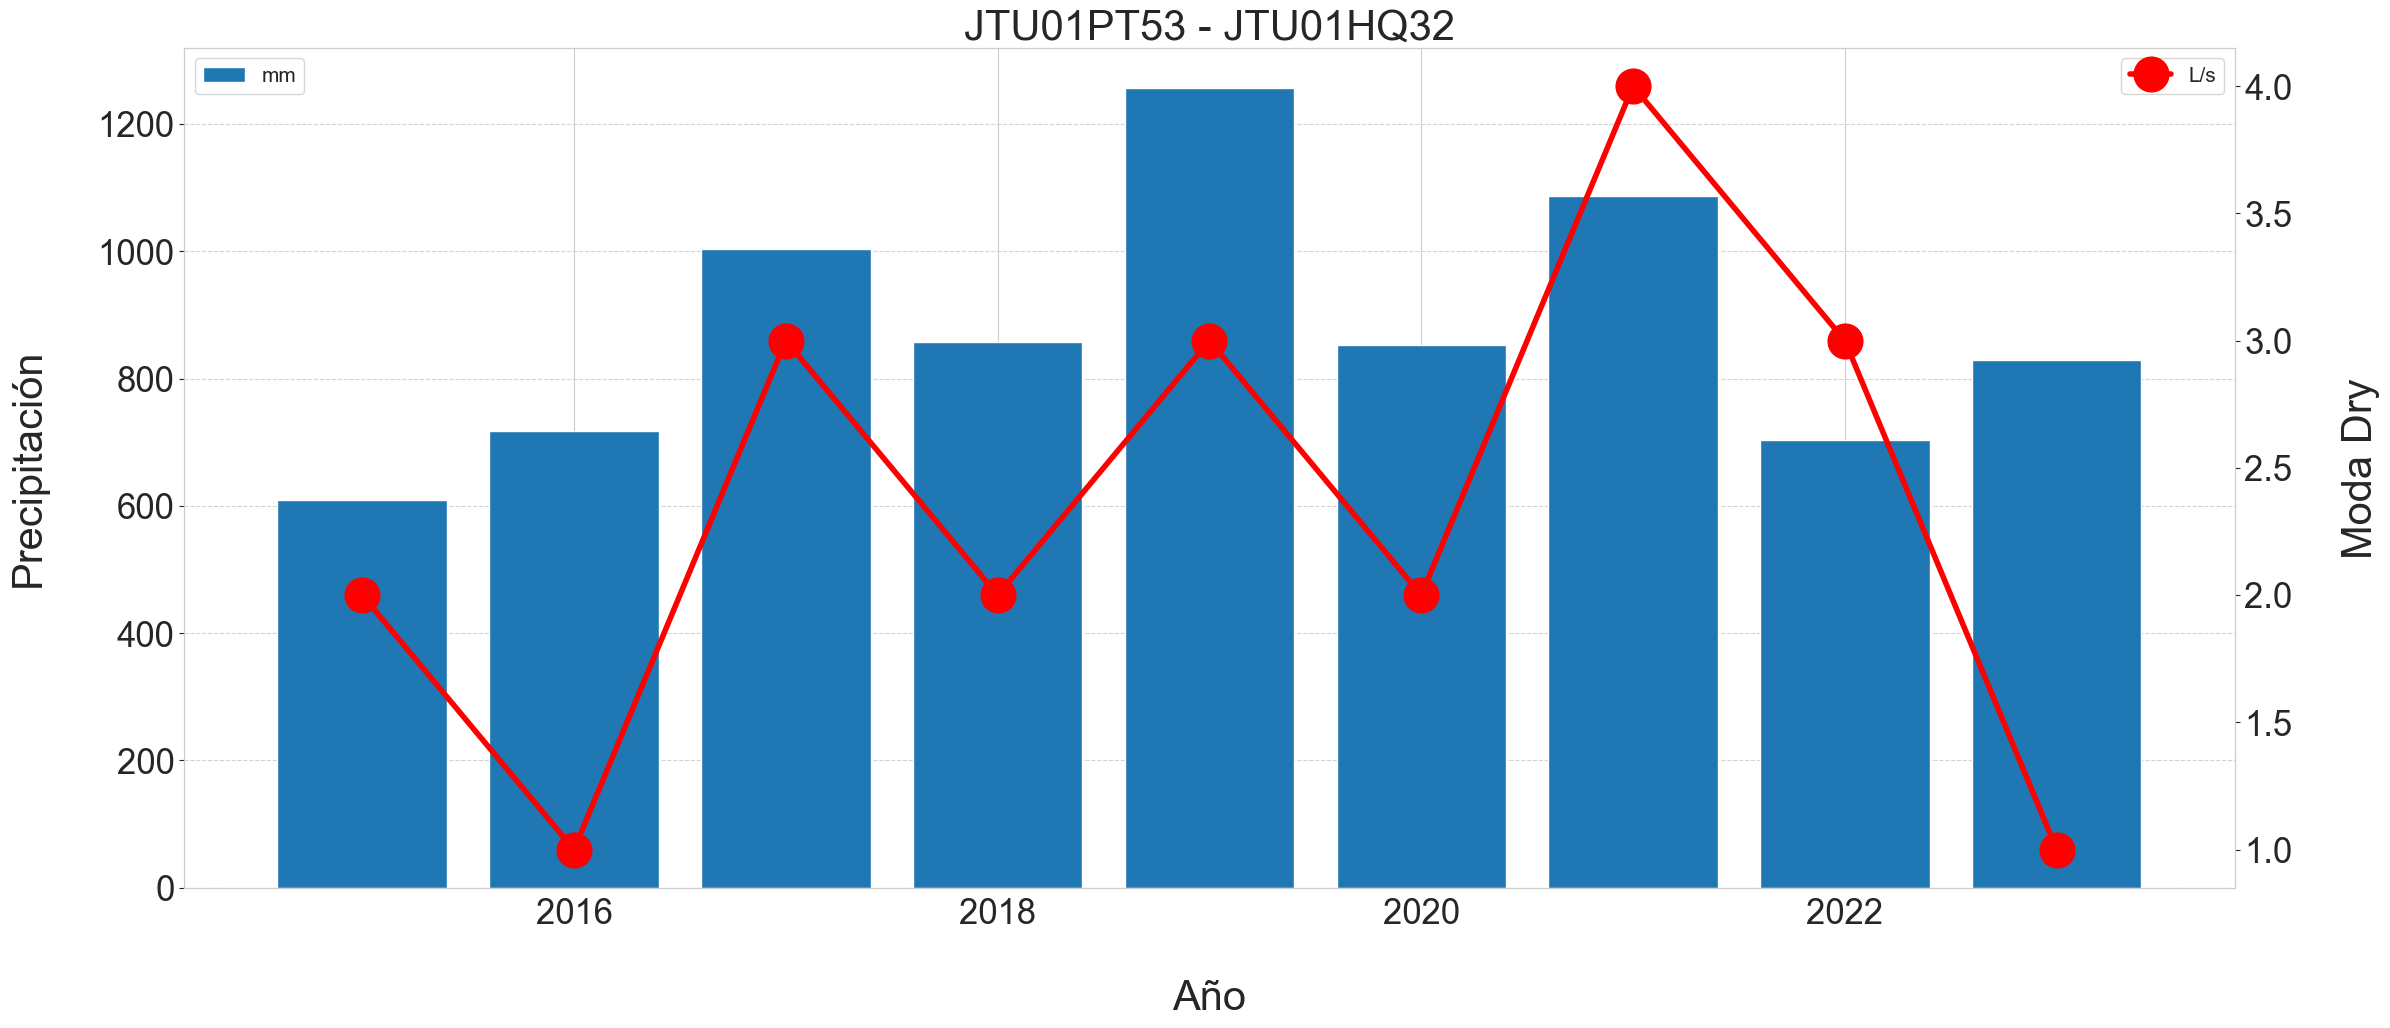

2014 2013

 (2015,)
   JTU01PT73  mes
0       26.9    9
1       34.1   12
2       35.9    8
3       50.1    1
4       54.2    2
mes analizandose 9 mes anterior 8
precip 26.9

 (2016,)
   JTU01PT73  mes
0       32.0    8
1       35.5    1
2       46.9   11
3       61.1    2
4       63.3    7
mes analizandose 8 mes anterior 7
precip 32.0

 (2017,)
   JTU01PT73  mes
0       35.1    7
1       42.2    9
2       61.4    2
3       61.6    8
4       66.9   12
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
precip 42.2

 (2018,)
   JTU01PT73  mes
0       46.5    6
1       46.8    8
2       47.5    7
3       53.4    3
4       55.8   10
mes analizandose 6 mes anterior 5
mes analizandose 8 mes anterior 7
precip 46.8

 (2019,)
   JTU01PT73  mes
0       32.8    8
1       43.2    1
2       61.9    9
3       69.9    3
4       74.0   12
mes analizandose 8 mes anterior 7
mes analizandose 1 mes anterior 0
mes analizandose 9 mes anterior 8
precip 61.9

 (2020,)
   JTU01PT73  mes
0     

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

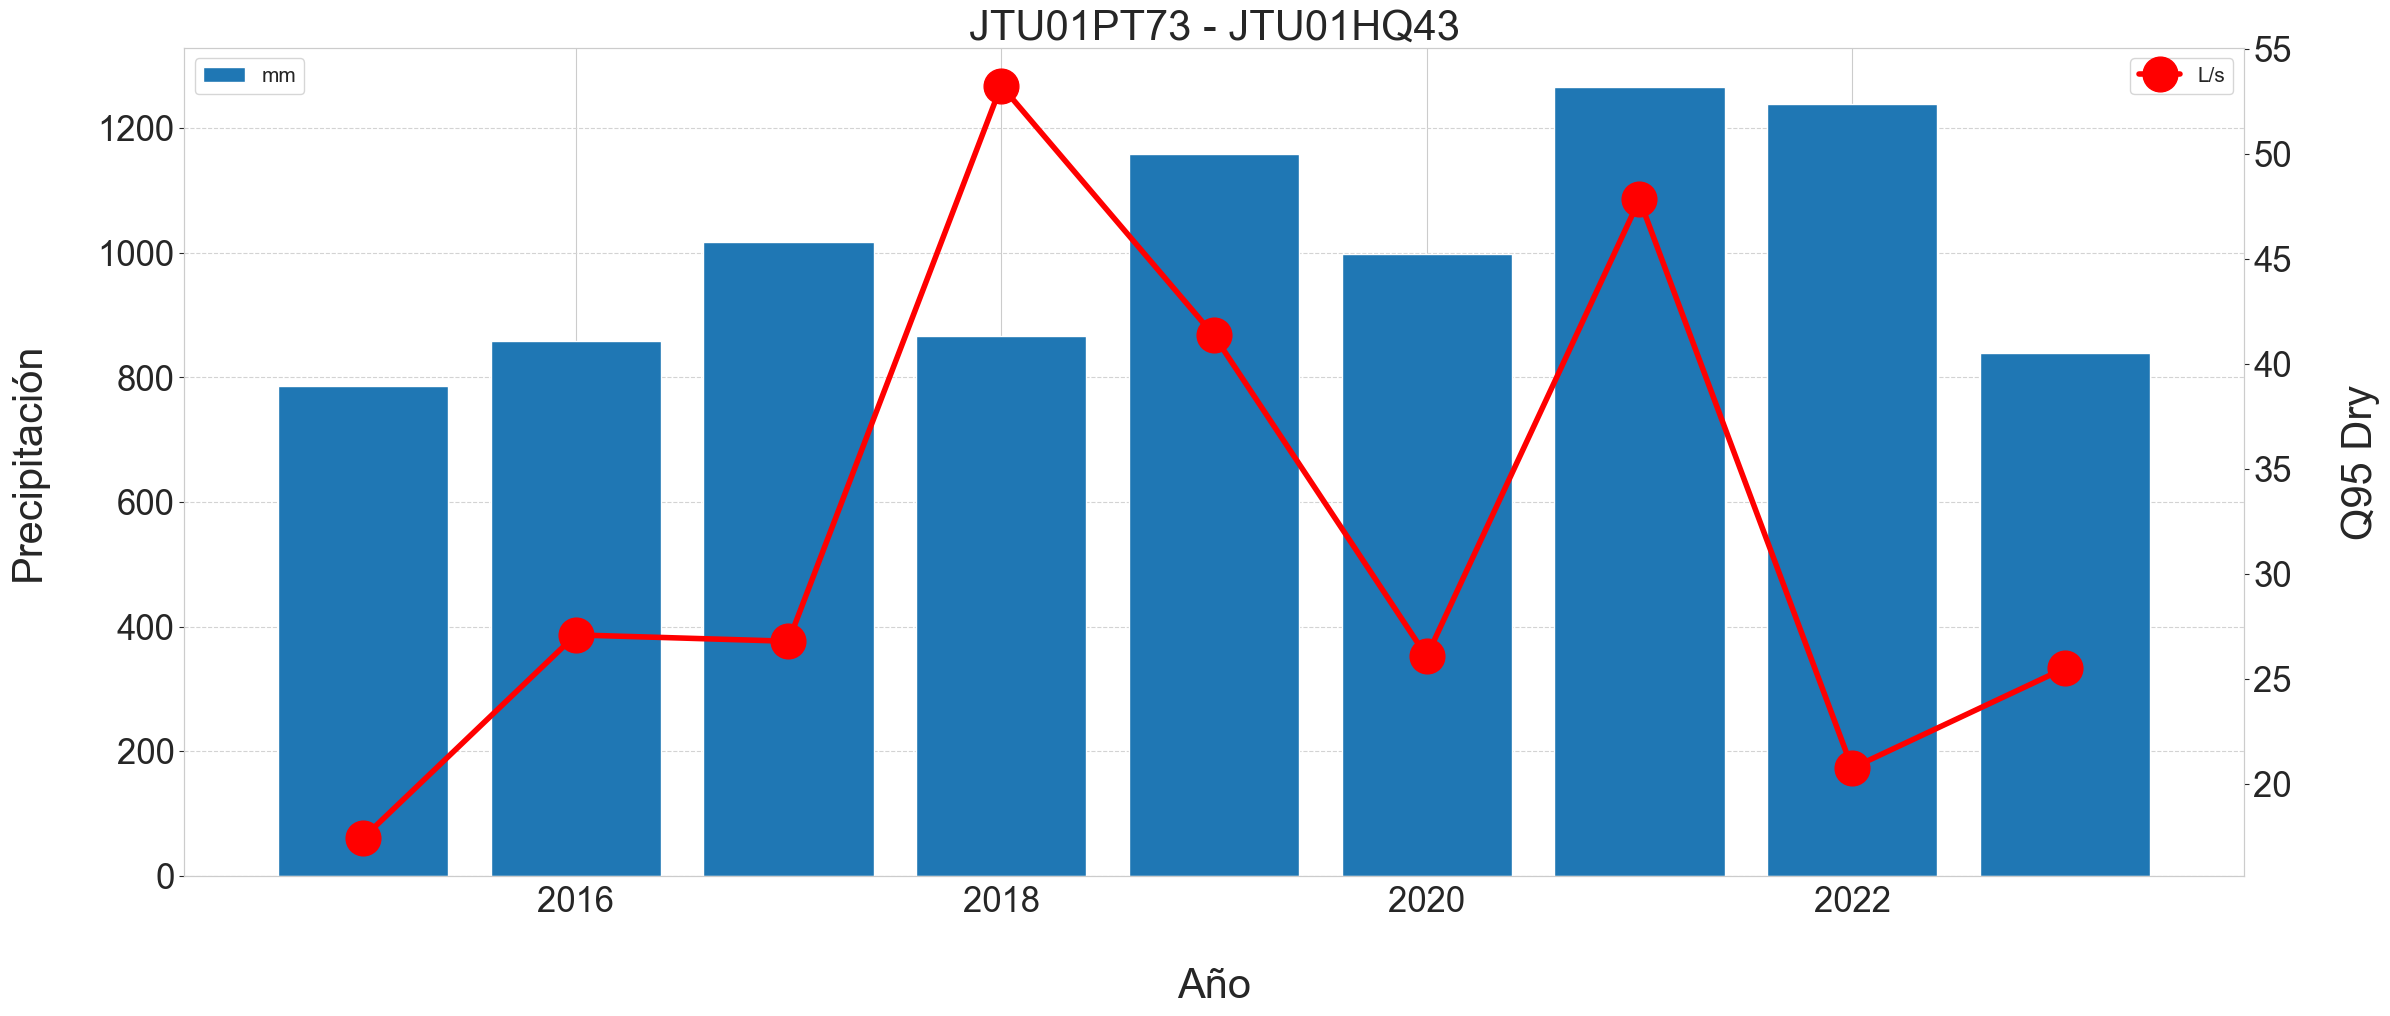

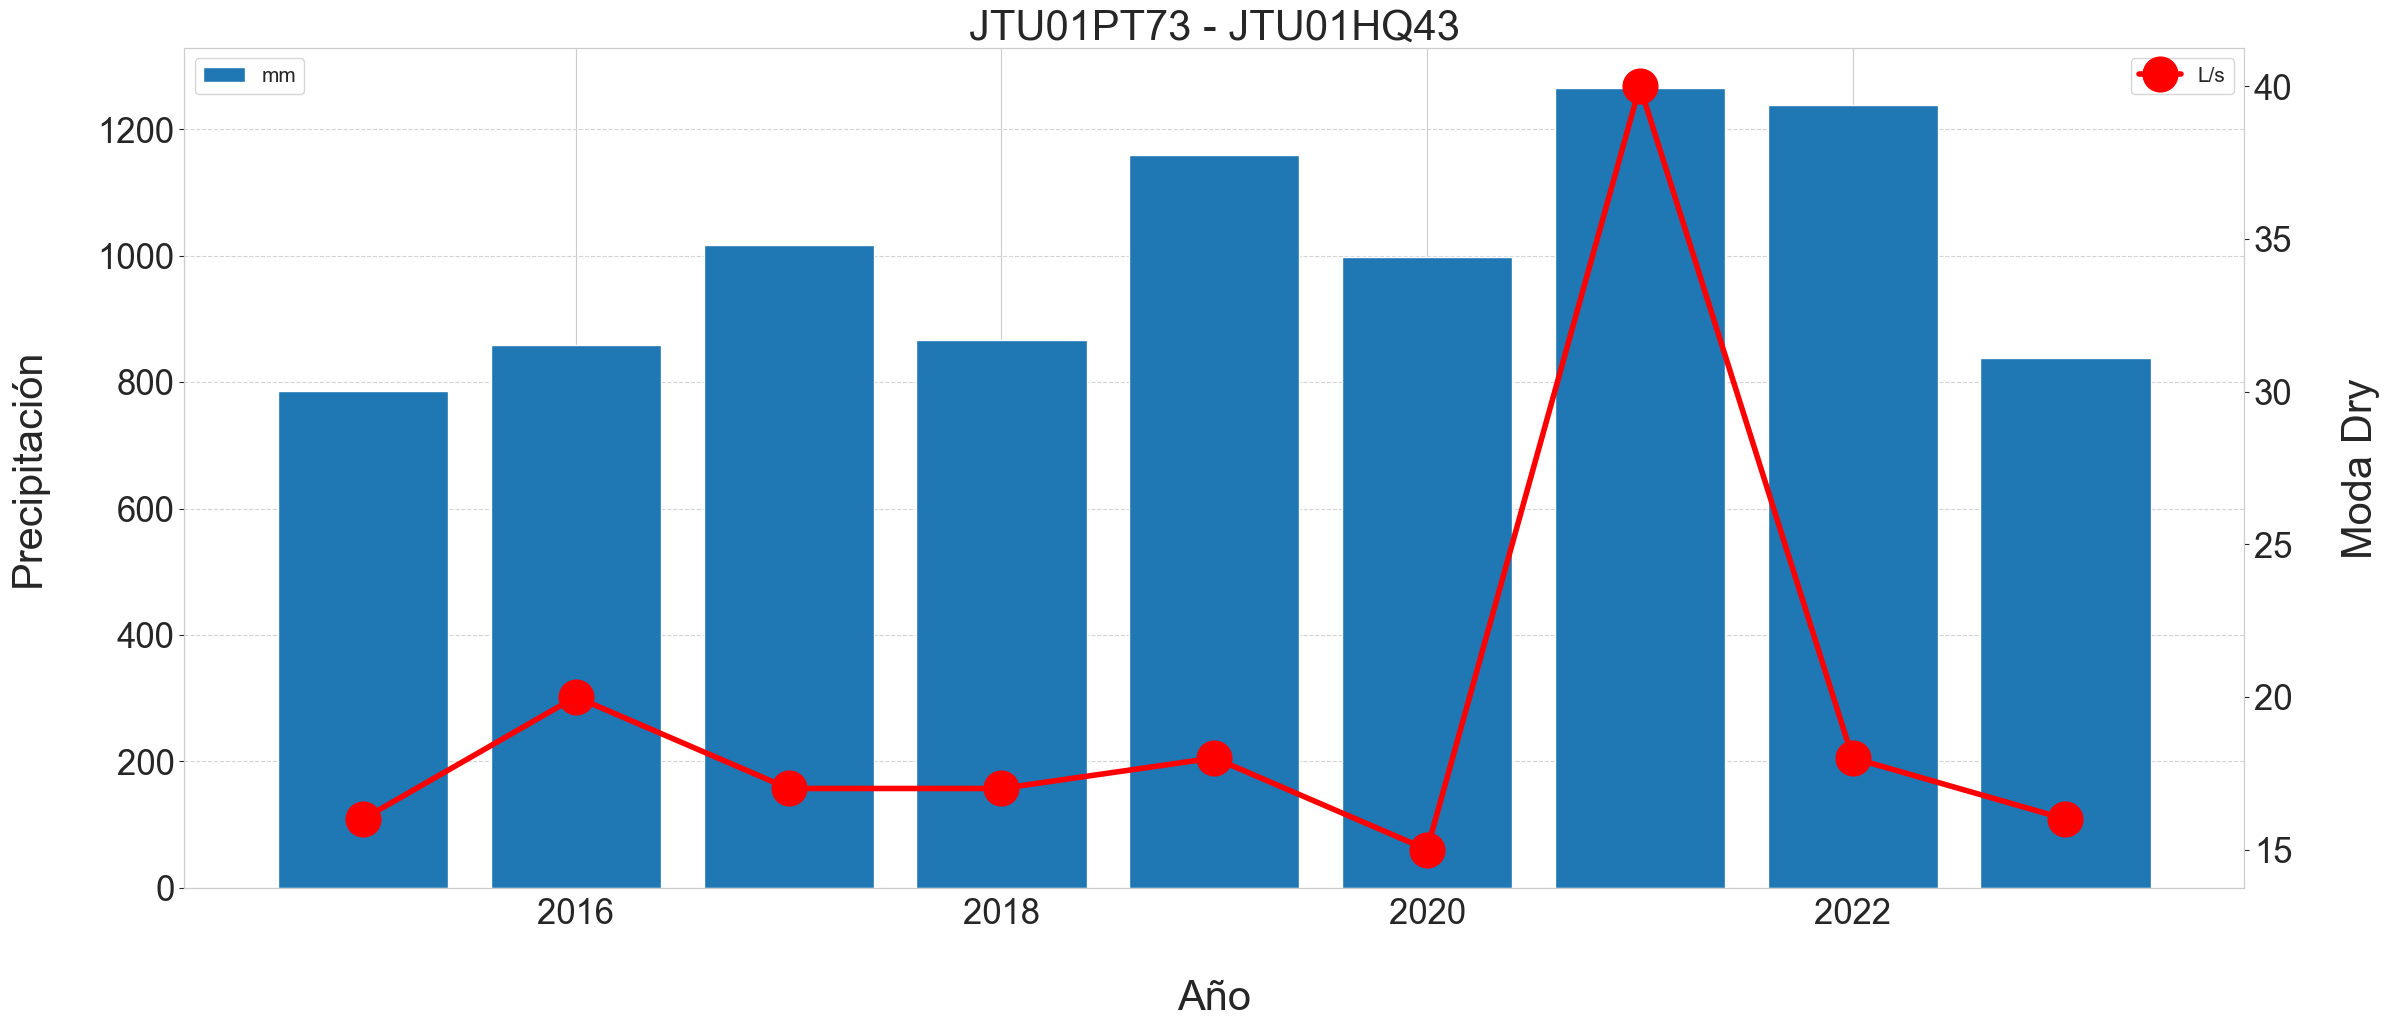

C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(np.round(q,0))[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_25324\406507921.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

2011 2005

 (2012,)
    C11  mes
0   3.3    7
1  13.3    8
2  14.0    6
3  38.8    9
4  82.3    5
mes analizandose 7 mes anterior 6
precip 3.3

 (2013,)
     C11  mes
0    0.1    8
1    4.0    6
2    7.3    7
3   30.7    9
4  109.1    3
mes analizandose 8 mes anterior 7
precip 0.1

 (2014,)
    C11  mes
0   2.2    8
1   9.9    7
2  19.3    6
3  66.1    9
4  92.3    4
mes analizandose 8 mes anterior 7
precip 2.2

 (2015,)
    C11  mes
0  26.2    6
1  28.3    7
2  62.6    4
3  66.9    5
4  72.7    1
mes analizandose 6 mes anterior 5
precip 26.2

 (2016,)
    C11  mes
0   4.6    8
1   8.6    7
2  38.6    9
3  44.0    6
4  82.5   11
mes analizandose 8 mes anterior 7
precip 4.6

 (2017,)
     C11  mes
0    5.8    7
1   29.7    9
2   33.6    8
3  112.9    6
4  151.8   10
mes analizandose 7 mes anterior 6
mes analizandose 9 mes anterior 8
precip 29.7

 (2018,)
     C11  mes
0   25.0    8
1   29.6    6
2   53.0    7
3  114.1    1
4  124.8   10
mes analizandose 8 mes anterior 7
precip 25.0

 (2

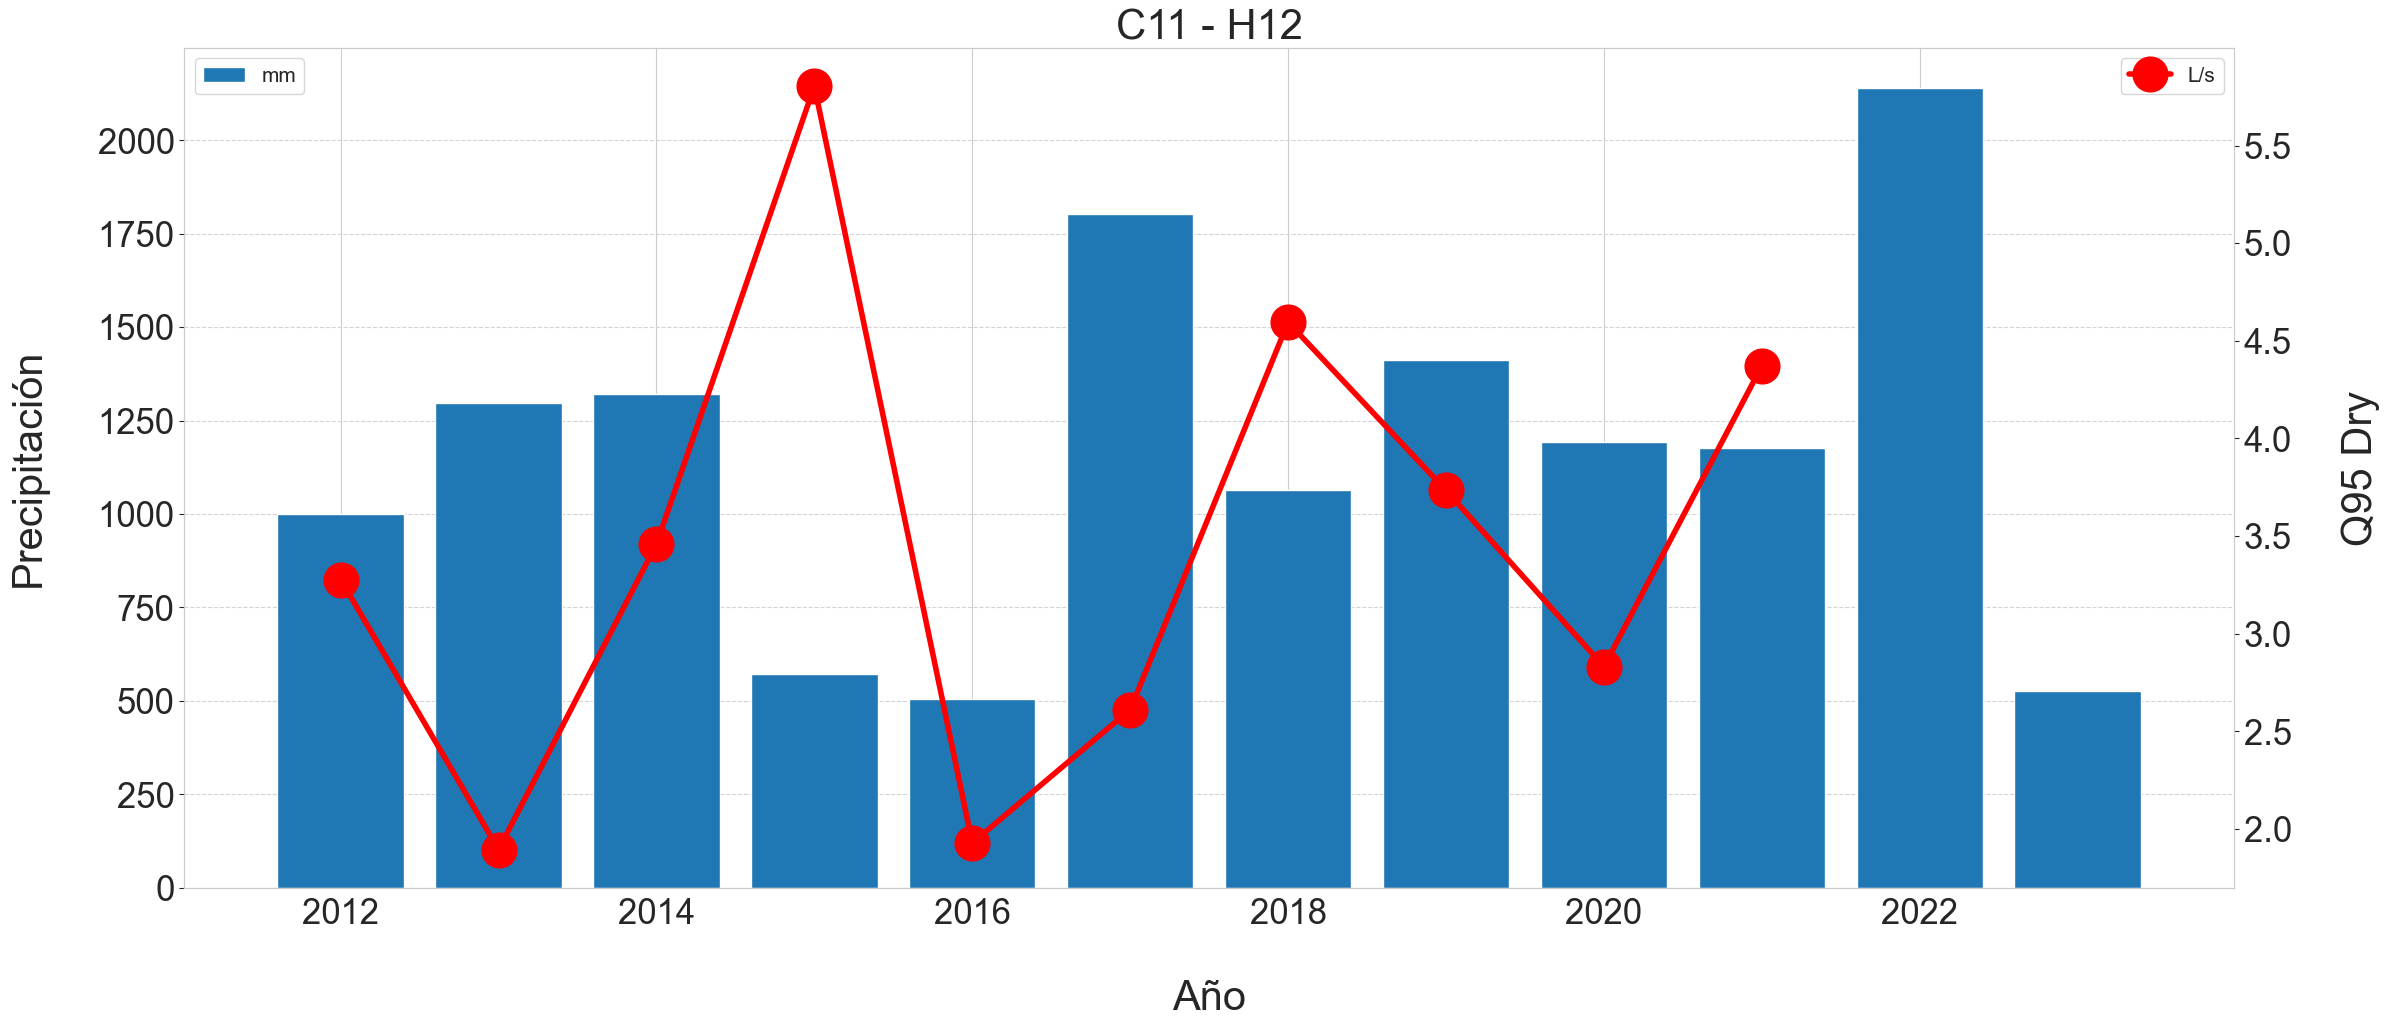

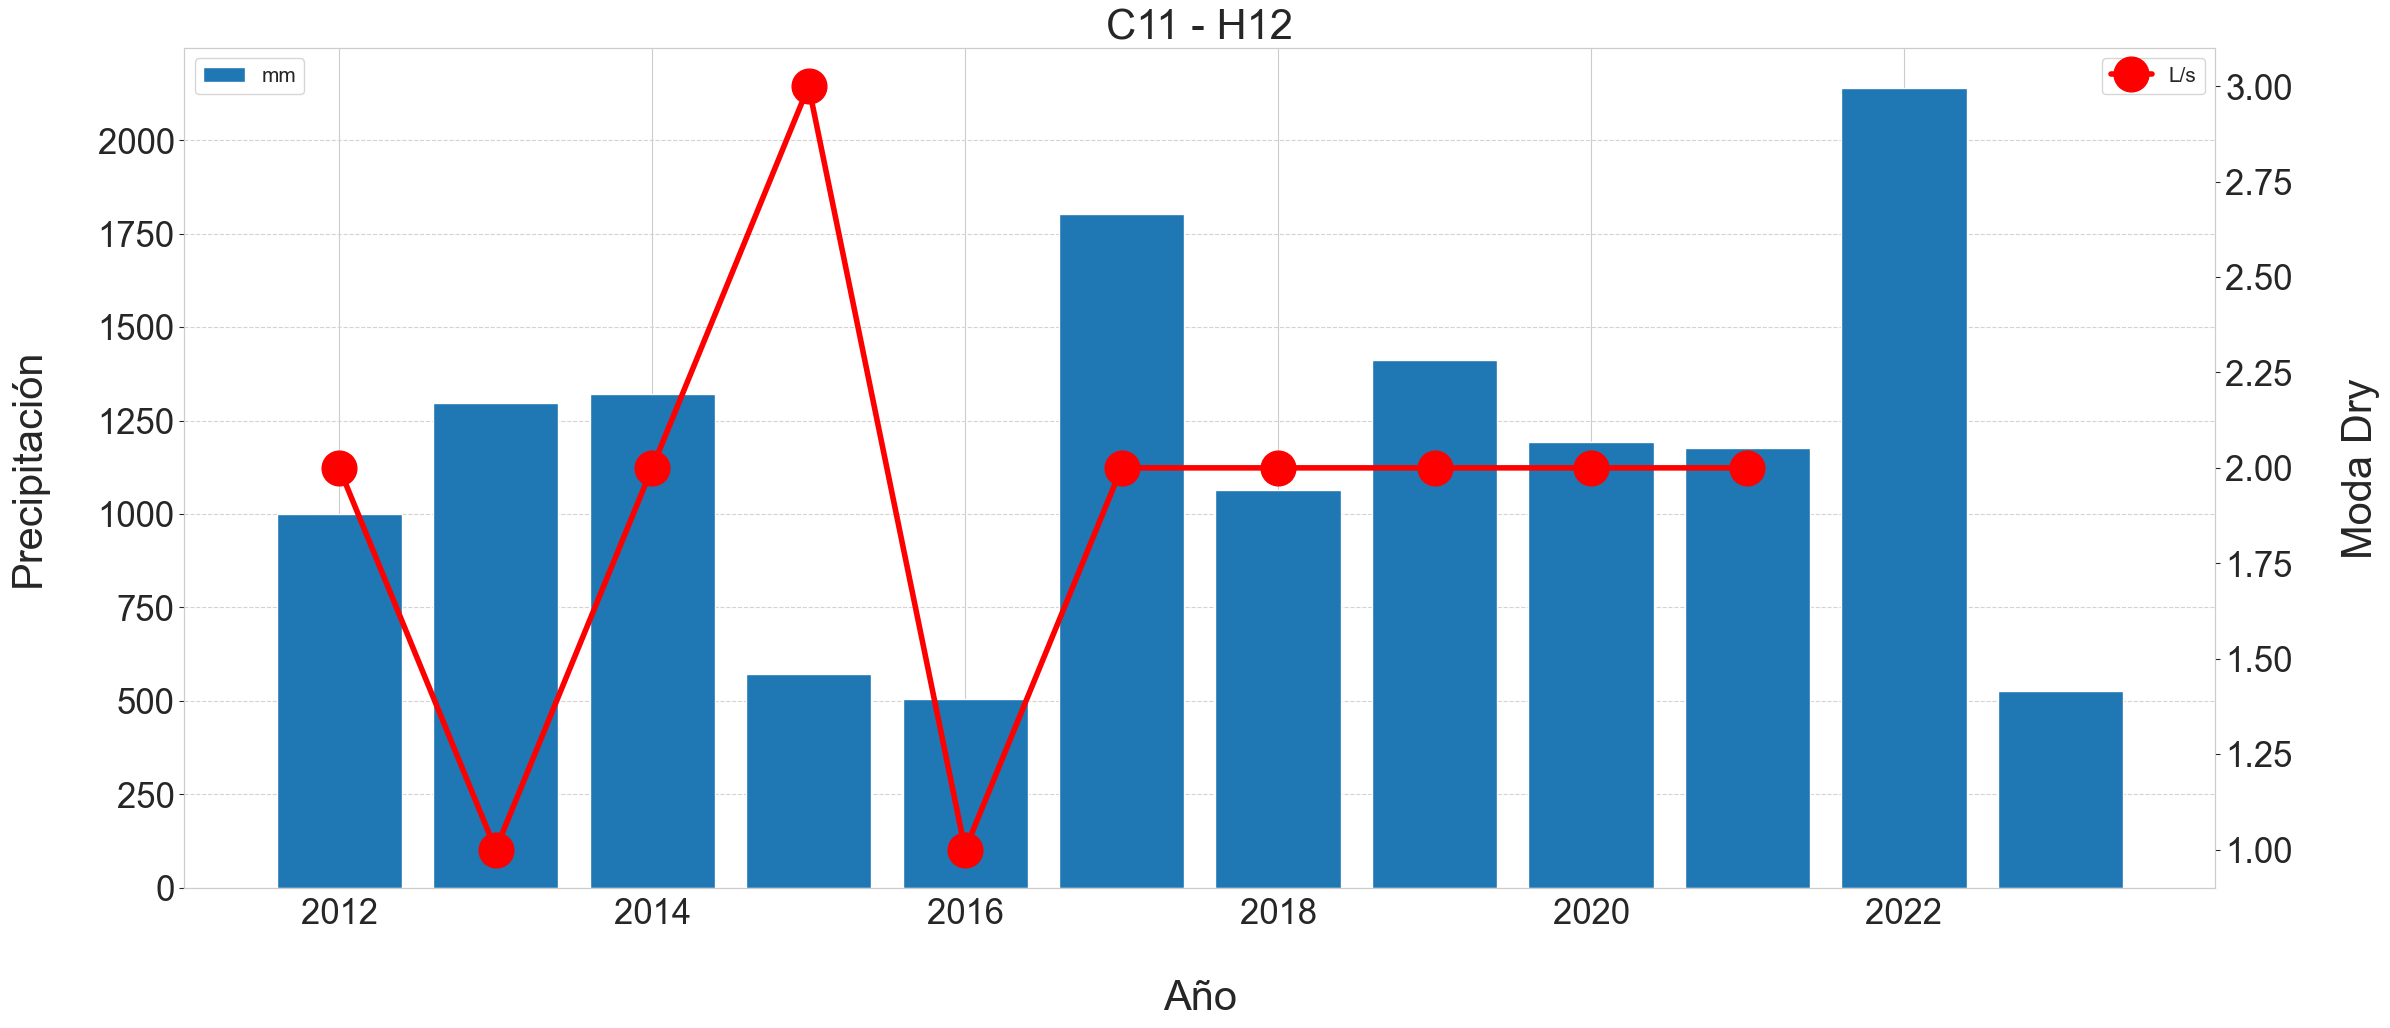

In [16]:
for precip_station, hidro_station in zip(["ATP01PT02","JTU01PT32","JTU01PT53","JTU01PT73","C11"],["ATP02HI01","JTU01HQ22","JTU01HQ32","JTU01HQ43","H12"]):
    
    min_date_p = precips_df[precip_station].dropna().index.year.min()
    min_date_q = caudales[hidro_station].dropna().index.year.min()
    min_date = max(min_date_p, min_date_q) +1

    print(min_date_p, min_date_q)

    pp = precips_df[precip_station].dropna().loc[precips_df[precip_station].dropna().index >= str(min_date)]
    precip_mensual_grouped = pp.groupby([pp.index.year])

    years = []
    precips =[]
    q95_dry = []
    moda_dry = []
    mediana_dry = []

    for year,pm in precip_mensual_grouped:
        years.append(year[0])

        print("\n",year)
        precip_ranked = pd.DataFrame(pm.sort_values())
        precip_ranked["mes"] = precip_ranked.index.month
        precip_ranked = precip_ranked.reset_index()
        precip_ranked = precip_ranked.drop("Fecha",axis=1)
        precip_ranked = precip_ranked.head(5)
        print(precip_ranked)

        acierto = False
        for mes in precip_ranked["mes"].values:
            print("mes analizandose",mes, "mes anterior",mes-1)

            q = caudales[hidro_station].loc[(caudales[hidro_station].index.year == year) & (caudales[hidro_station].index.month == mes)]
            q = q.dropna()

            if ((mes-1) in precip_ranked["mes"].values) and (len(q>570)):
                #p = precip_ranked.loc[precip_ranked.mes == mes].values[0]
                p = precip_ranked.loc[precip_ranked.mes == mes].values[0]
                precips.append(pm.sum())
                print("precip",p[0])

                q95_dry.append(np.percentile(q,95))

                moda = stats.mode(np.round(q,0))[0][0]
                moda_dry.append(moda)

                acierto =True
                break

        if acierto == False:
            #precips.append(p[0])
            precips.append(pm.sum())

            q95_dry.append(np.nan)
            moda_dry.append(np.nan)
            mediana_dry.append(np.nan)
            print("Error")
            xxx = input("error")


    fig, ax = plt.subplots(figsize=(24,10))
    ax2 = ax.twinx()

    #ax.set_title('my title',size=25)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('\nAño',size=30)

    ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
    ax.set_ylabel('Precipitación\n',size=30)
    ax.legend(['mm'], loc='upper left',prop={'size': 15})

    ax2.plot(years,q95_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
    ax2.set_ylabel('\nQ95 Dry',size=30)
    ax2.legend(['L/s'], loc='upper right',prop={'size': 15})



    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    #plt.savefig(".pdf")
    #plt.savefig(".png")
    plt.title(precip_station+' - '+hidro_station,size=30)
    plt.grid(False)
    plt.show()

    fig, ax = plt.subplots(figsize=(24,10))
    ax2 = ax.twinx()

    #ax.set_title('my title',size=25)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('\nAño',size=30)

    ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
    ax.set_ylabel('Precipitación\n',size=30)
    ax.legend(['mm'], loc='upper left',prop={'size': 15})

    ax2.plot(years,moda_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
    ax2.set_ylabel('\nModa Dry',size=30)
    ax2.legend(['L/s'], loc='upper right',prop={'size': 15})

    ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    #plt.savefig(".pdf")
    #plt.savefig(".png")
    plt.title(precip_station+' - '+hidro_station,size=30)
    plt.grid(False)
    plt.show()
    

        